<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">**Capstone Project NLP-AUTOMATIC TICKET ASSIGNMENT submitted for PGP-AIML Great Learning on 28-August-2022**

**Authors** : *Bharath Kumar N*, *Indumathi Pandiyan*, *Jagmeet Singh Malhotra*, *Sreekanth Raghuveer Maringanti*, *Sri Ramana Govinda Rao*, *Timarkanta Sharma*

## Project Description

**DOMAIN:** Automatic Ticketing System.

**CONTEXT:** One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations. IT
leverages Incident Management process to achieve the above Objective. An incident is something that is unplanned interruption to an IT
service or reduction in the quality of an IT service that affects the Users and the Business. The main goal of Incident Management process is
to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no
business impact. In most of the organisations, incidents are created by various Business and IT Users, End Users/ Vendors if they have
access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit
in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The
assignment of incidents to appropriate IT groups is still a manual process in many of the IT organisations. Manual assignment of incidents is
time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out
ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result
in user satisfaction deterioration / poor customer service.

**Business Domain Value:** In the support process, incoming incidents are analysed and assessed by organisations support teams to
fulfill the request. In many organisations, better allocation and effective usage of the valuable support resources will directly result in
substantial cost savings. Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT
Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket
categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2
teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and
Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3
teams will carry out detailed diagnosis and resolve the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if
vendor support is needed, they will reach out for their support towards incident closure. L1 / L2 needs to spend time reviewing Standard
Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before
ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to
L3 teams. During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents
getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed
for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed
timely resulting in poor customer service. Guided by powerful AI techniques that can classify incidents to right functional groups can help
organizations to reduce the resolving time of the issue and can focus on more productive tasks.

### Table of Contents

**1. Pre-Processing, Data Visualisation and EDA**<br>

&nbsp;1.1 Exploring the given Data files<br>
&nbsp;1.2 Understanding the structure of data<br>
&nbsp;1.3 Missing points in data and its handling <br>
&nbsp;1.4 Finding inconsistencies in the data<br>
&nbsp;1.5 Visualising different patterns<br>
&nbsp;1.6 Visualising different text features<br>
&nbsp;1.7 Text preprocessing<br>
&nbsp;1.8 Creating word vocabulary from the corpus of report text data<br>
&nbsp;1.9 Creating tokens as required<br>

**2.Model Building**<br>

&nbsp;2.1 upsampling<br>
&nbsp;2.2 X, y split with upsampled data<br>
&nbsp;2.3 X, y split with Original data<br>

**3. Machine Learning Models**<br>

&nbsp;**3.1 MultinomialNB**<br>
- 3.1.1  MultinomialNB upsampled data
- 3.1.2  MultinomialNB Original data


&nbsp;**3.2 Linear Support Vector Machine**<br> 
- 3.2.1  Linear Support Vector Machine upsampled data
- 3.2.2  Linear Support Vector Machine Original data


&nbsp;**3.3 Random Classifier**<br>
- 3.3.1  Random Classifier upsampled data
- 3.3.2  Random Classifier Original data


&nbsp;**3.4 LogisticRegression**<br>
- 3.4.1  LogisticRegression upsampled data
- 3.4.2  LogisticRegression Original data


&nbsp;**3.5  Xgboost**<br> 
- 3.5.1  Xgboost upsampled data
- 3.5.2  Xgboost Original data



&nbsp;**3.8 Hyper parameter Tuning**<br>

**4. Deep Learning Models**<br>

&nbsp;**4.1 LSTM**<br> 
- 4.1.1  LSTM upsampled data
- 4.1.2  LSTM Original data

&nbsp;**4.2 Bi-directional LSTM**<br>
- 4.2.1  Bi-directional LSTM  upsampled data
- 4.2.2  Bi-directional LSTM  Original data

&nbsp;**4.3 Fast Text**<br> 
- 4.3.1  Fast Text  upsampled data
- 4.3.2  Fast Text  Original data

&nbsp;**4.4 BERT**<br>
- 4.4.1  BERT upsampled data
- 4.4.2  BERT Original data

**5.Model Comparison**<br>

&nbsp;**5.1 Model Comparison upsampled data**<br> 
&nbsp;**5.2 Model Comparison original data**<br> 

**6.Finalizing the best Model**<br>

**7.Predicting with best Model**<br>

**8.Conclusion**<br>



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Load the required Libraries

In [2]:
#load required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS 
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#add to remove warning for python 3.6 dependency
import warnings
import string 
import pandas.util.testing as tm
plt.style.use('ggplot')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


# 1. Pre-Processing, Data Visualisation and EDA

## 1.1 Exploring the given Data file

In [3]:
#Load data to dataframe 
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/input_data.xlsx')

In [4]:
data.head(10)

Short description  \
0                                        login issue   
1                                            outlook   
2                                 cant log in to vpn   
3                      unable to access hr_tool page   
4                                       skype error    
5     unable to log in to engineering tool and skype   
6  event: critical:HostName_221.company.com the v...   
7  ticket_no1550391- employment status - new non-...   
8               unable to disable add ins on outlook   
9                    ticket update on inplant_874773   

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   
5     unable to log in to engineering tool and skype  eflahbxn ltdgrvkz   
6  event: critical:HostName_221.company.com the v...  jyoqwxhz clhxsoqy   
7  ticket_no1550391- employment status - new non-...  eqzibjhw ymebpoih   
8               unable to disable add ins on outlook  mdbegvct dbvichlg   
9                    ticket update on inplant_874773  fumkcsji sarmtlhy   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0  
5            GRP_0  
6            GRP_1  
7            GRP_0  
8            GRP_0  
9            GRP_0

### Observations from first look
* 4 Columns Short Desription Description Caller Assignment 
* Questions to be answered 
* Would classification of data depend on caller i.e. is there a caller that raises ticken only in certain category ?
* Name of callers looks masked so that they cannot be identified not sure how much information can be captured from that
* Lot of cleanup required in Description column

## 1.2 Understanding the structure of data 

In [5]:
data.shape
#There are 8500 rows & 4 Columns

(8500, 4)

In [6]:
data.info()
#Short description , Description have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [7]:
data.describe(include='all').T

count unique                top  freq
Short description  8492   7481     password reset    38
Description        8499   7817                the    56
Caller             8500   2950  bpctwhsn kzqsbmtp   810
Assignment group   8500     74              GRP_0  3976

### Notes
#### Not much data is missing for short description and desciption. Will see if a cobination of short description + description solve null value issue. To beign with will replace null value with  ' ' 
#### Maximum unique tickets are for password reset. There will be more will see how many password reset tickets are there after we have done Term Frequency analysis and removed words that add little or no information 
#### 50% tickets are for GRP_0 will try to see that types of tickets are getting assigned to GRP_0 and why ?
#### One tenth of the tickets are being created by caller "bpctwhsn kzqsbmtp" it would be good to see if there is a pattern for its tickets e.g. are they system generated tickets etc
#### In 56 cases description only contains the word the, it looks like for these tickets short description will have all the information required to resolve the issues. Hence we may have to see if both short desciption + description has to be joined as one string to do the analysis

## 1.3 Missing values and its handling

In [8]:
#1. Handle the null values in data 

In [9]:
data.isnull().sum()
#missing values in the dataset, within 'Short decription' and 'Description' columns, 

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [10]:
data[pd.isnull(data).any(axis=1)]
#Null Values

Short description  \
2604                       NaN   
3383                       NaN   
3906                       NaN   
3910                       NaN   
3915                       NaN   
3921                       NaN   
3924                       NaN   
4341                       NaN   
4395  i am locked out of skype   

                                            Description             Caller  \
2604  _x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...  ohdrnswl rezuibdt   
3383  _x000D_\n-connected to the user system using t...  qftpazns fxpnytmk   
3906  -user unable  tologin to vpn._x000D_\n-connect...  awpcmsey ctdiuqwe   
3910  -user unable  tologin to vpn._x000D_\n-connect...  rhwsmefo tvphyura   
3915  -user unable  tologin to vpn._x000D_\n-connect...  hxripljo efzounig   
3921  -user unable  tologin to vpn._x000D_\n-connect...  cziadygo veiosxby   
3924  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...  wvqgbdhm fwchqjor   
4341  _x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...  eqmuniov ehxkcbgj   
4395                                                NaN  viyglzfo ajtfzpkb   

     Assignment group  
2604           GRP_34  
3383            GRP_0  
3906            GRP_0  
3910            GRP_0  
3915            GRP_0  
3921            GRP_0  
3924            GRP_0  
4341            GRP_0  
4395            GRP_0

In [11]:
# Null Values in Description and Short Description columns looks mutually exclusive 
# i.e. when description is present Short Description is not present and vice versa. 
# Let's replace null values with ' ' so that later we can combine both columns short description 
# and description to do NLP

In [12]:
data.fillna(" ", inplace = True)

In [13]:
data.isna().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [14]:
# No Null Values left in data

## 1.4 Finding inconsistencies in the data 

### We will see data if there is 


#### Unbalanced Data

#### Data from differnt sources not represented properly

#### Differnt Origin/Language


In [15]:
# Looking at unbalanced data

In [16]:
data['Assignment group'].nunique()
#74 Unique Assignment group

74

In [17]:
data['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_64       1
GRP_67       1
GRP_35       1
GRP_70       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64

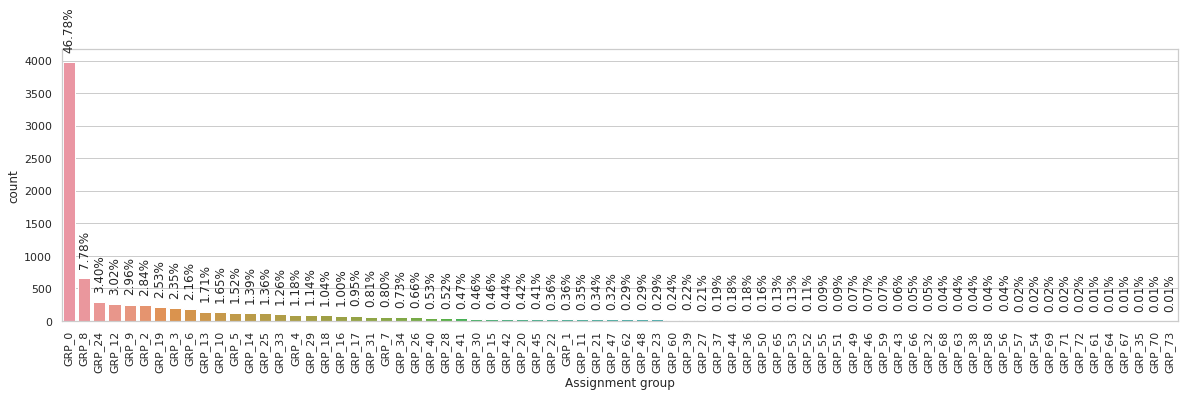

In [18]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=data, order=data["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(data.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

#### This is a imbalanced dataset, with majority of incidents are from Group 0 followed by Group 8 , 24 , 12 , 9 , 2 and so on
#### There are few classes which just have less 10 incidents pers class and even classed with just 1 or 2 incidents, 
#### need to see if we can drop those rows due to the lack of samples representing those classes. 
#### They might not be of much help as a predictor

In [19]:
# view the top 20 Assignment groups with highest number of ticket
df_top_20 = data['Assignment group'].value_counts().nlargest(20).reset_index()
df_top_20

index  Assignment group
0    GRP_0              3976
1    GRP_8               661
2   GRP_24               289
3   GRP_12               257
4    GRP_9               252
5    GRP_2               241
6   GRP_19               215
7    GRP_3               200
8    GRP_6               184
9   GRP_13               145
10  GRP_10               140
11   GRP_5               129
12  GRP_14               118
13  GRP_25               116
14  GRP_33               107
15   GRP_4               100
16  GRP_29                97
17  GRP_18                88
18  GRP_16                85
19  GRP_17                81

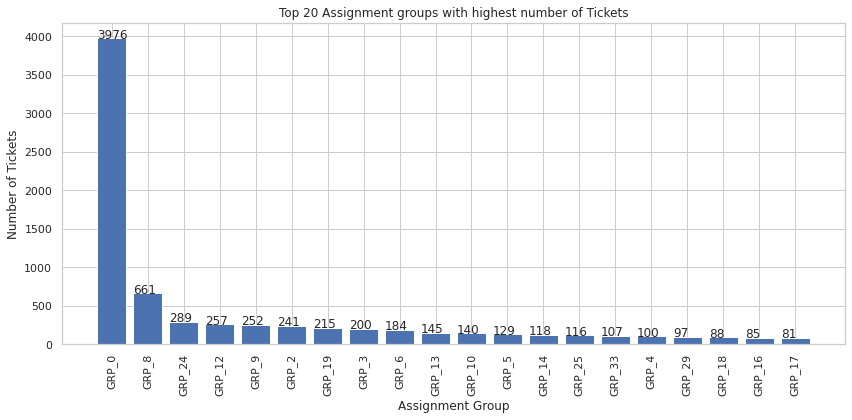

In [20]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_20['index'],df_top_20['Assignment group'])
plt.title('Top 20 Assignment groups with highest number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

In [21]:
df_inc = data['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

index  Assignment group  percentage
0   GRP_0              3976   46.776471
1   GRP_8               661    7.776471
2  GRP_24               289    3.400000
3  GRP_12               257    3.023529
4   GRP_9               252    2.964706

In [22]:
#Distribute tickets into bins
df_bins = pd.DataFrame(columns=['Description','Ticket Count'], dtype=object)
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_inc[df_inc['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 5)& (df_inc['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 10)& (df_inc['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 20)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins

Description Ticket Count
0        1 ticket            6
1      2-5 ticket           13
2     6-10 ticket            6
3    11-20 ticket            9
4    21-50 ticket           16
5   51-100 ticket            9
6     >100 ticket           15

In [23]:
#view the bottom 20 Assignment groups with less number of tickets
df_bottom_20 = data['Assignment group'].value_counts().nsmallest(20).reset_index()
df_bottom_20

index  Assignment group
0   GRP_61                 1
1   GRP_64                 1
2   GRP_67                 1
3   GRP_35                 1
4   GRP_70                 1
5   GRP_73                 1
6   GRP_57                 2
7   GRP_54                 2
8   GRP_69                 2
9   GRP_71                 2
10  GRP_72                 2
11  GRP_68                 3
12  GRP_63                 3
13  GRP_38                 3
14  GRP_58                 3
15  GRP_56                 3
16  GRP_66                 4
17  GRP_32                 4
18  GRP_43                 5
19  GRP_49                 6

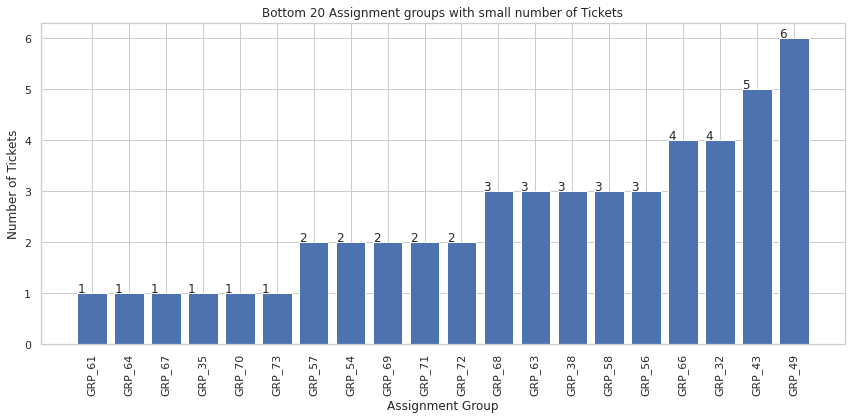

In [24]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_bottom_20['index'],df_bottom_20['Assignment group'])
plt.title('Bottom 20 Assignment groups with small number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

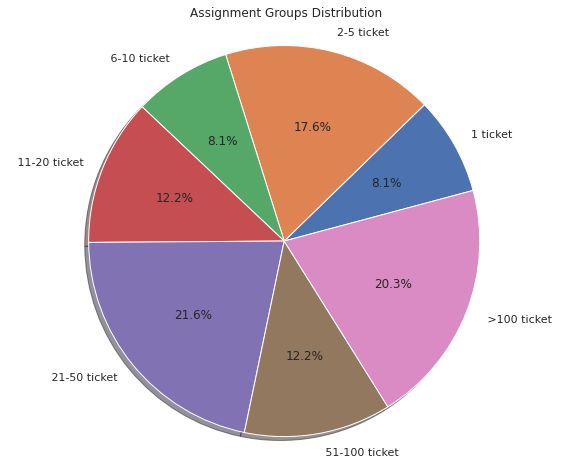

In [25]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

#### There are 6 Assignment Group’s for which just have 1 ticket in the dataset
#### There are 15 Assignment group’s which have more than 100 tickets.
#### Only 20% of the Assignment groups have greater than 100 tickets.

#### Note : Data is unbalanced for certain classes, while modelling we will see how to use algorithms like boosting  and bagging to balance the data also where data set is very small for classification we will not model those groups. 

In [26]:
# Frequent Caller Analysis

In [27]:
data['Caller'].value_counts()

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
                    ... 
lfcwmxap ehodblur      1
lszhkxoy blemoyjd      1
dnjxilqu povreyhq      1
eyoqnkjl gakhdebf      1
kqvbrspl jyzoklfx      1
Name: Caller, Length: 2950, dtype: int64

In [28]:
#See if any caller rasied ricket only in any specific group
data['Caller'].groupby(data['Assignment group']).value_counts().nlargest(10)

Assignment group  Caller           
GRP_8             bpctwhsn kzqsbmtp    362
GRP_9             bpctwhsn kzqsbmtp    153
GRP_0             fumkcsji sarmtlhy    132
GRP_5             bpctwhsn kzqsbmtp     96
GRP_6             bpctwhsn kzqsbmtp     89
GRP_0             rbozivdq gmlhrtvp     86
GRP_10            bpctwhsn kzqsbmtp     60
GRP_0             olckhmvx pcqobjnd     54
GRP_8             ZkBogxib QsEJzdZO     54
GRP_0             efbwiadp dicafxhv     45
Name: Caller, dtype: int64

### Notes: 
#### fumkcsji sarmtlhy has rasied 134 tickets and 132 tickets out of it have been in Group0
#### rbozivdq gmlhrtvp has rasied 87 tickets and 86 of it is in GRP_0
#### olckhmvx pcqobjnd has raised 54 ticekts and all 54 are in GRP_0

In [29]:
# Finding if data has issues while getting captured from differnt sources

In [30]:
data.tail(10)

Short description  \
8490                         check status in purchasing   
8491                                     vpn for laptop   
8492                 hr_tool etime option not visitble    
8493           erp fi  - ob09, two accounts to be added   
8494  tablet needs reimaged due to multiple issues w...   
8495                  emails not coming in from zz mail   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498                     machine nÃ£o estÃ¡ funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
8490  please contact ed pasgryowski (pasgryo) about ...  mpihysnw wrctgoan   
8491  \n\nreceived from: jxgobwrm.qkugdipo@gmail.com...  jxgobwrm qkugdipo   
8492                 hr_tool etime option not visitble   tmopbken ibzougsd   
8493  i am sorry, i have another two accounts that n...  ipwjorsc uboapexr   
8494  tablet needs reimaged due to multiple issues w...  cpmaidhj elbaqmtp   
8495  _x000D_\n_x000D_\nreceived from: avglmrts.vhqm...  avglmrts vhqmtiua   
8496                           telephony_software issue  rbozivdq gmlhrtvp   
8497  vip2: windows password reset for tifpdchb pedx...  oybwdsgx oxyhwrfz   
8498  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8499  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group  
8490           GRP_29  
8491           GRP_34  
8492            GRP_0  
8493           GRP_10  
8494            GRP_3  
8495           GRP_29  
8496            GRP_0  
8497            GRP_0  
8498           GRP_62  
8499           GRP_49

In [31]:
# There is lot of garbled text. we guess that its happend because while capturing the data from web UTF to ASCII
# conversion may have happned introducing "curly quotes" i.e. mojibreaks  Cleaning the same. 
!pip install ftfy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
#Checking if ftfy is able to solve the problem
from ftfy import fix_encoding, fix_text, badness
fix_text('machine nÃ£o estÃ¡ funcionando')

'machine não está funcionando'

In [33]:
# Applying the fix on Short Description and Description so that data from differnt sources do not have inconsitency
data['Short description'] = data['Short description'].apply(fix_text)
data['Description'] = data['Description'].apply(fix_text)

In [34]:
# Visually checking the removal of mojibreaks
data

Short description  \
0                                           login issue   
1                                               outlook   
2                                    cant log in to vpn   
3                         unable to access hr_tool page   
4                                          skype error    
...                                                 ...   
8495                  emails not coming in from zz mail   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498                       machine não está funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
0     -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1     _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2     _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                         unable to access hr_tool page  xbkucsvz gcpydteq   
4                                          skype error   owlgqjme qhcozdfx   
...                                                 ...                ...   
8495  _x000D_\n_x000D_\nreceived from: avglmrts.vhqm...  avglmrts vhqmtiua   
8496                           telephony_software issue  rbozivdq gmlhrtvp   
8497  vip2: windows password reset for tifpdchb pedx...  oybwdsgx oxyhwrfz   
8498  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8499  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group  
0               GRP_0  
1               GRP_0  
2               GRP_0  
3               GRP_0  
4               GRP_0  
...               ...  
8495           GRP_29  
8496            GRP_0  
8497            GRP_0  
8498           GRP_62  
8499           GRP_49  

[8500 rows x 4 columns]

In [35]:
# Visual inspection of data also shows presence of other langauge. Which may give rise to incorrect classification 
# of tickets. We will analyse the number of langauges and translate them to English

In [36]:
# Combining Short Description and Description so that Langauge detection and translation is quicker 
def combineText(ShortDesc , Desc):
  finaltext = ""
  
  if ShortDesc == Desc:
    finaltext = Desc
  else:
    finaltext = ShortDesc + " " + Desc
  
  return  finaltext

In [37]:
# However before we are able to properly do lang detect. We will have to do clean-up of text so that 
# there are minimal special chacters left in the text
# lower the text , remove special character, remove names, remove emails
callers = data['Caller'].str.lower().unique()


In [38]:
def clean_text_before_lang_detect(text  ):
    #remove _x000D_
    text = re.sub(r'_x000D_', ' ',text)
    #remove tabs
    text = re.sub(r'\t', ' ',text)
    #remove puntuations
    text = text.translate(str.maketrans(' ',' ',string.punctuation))
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    #Remove leading & trailing Spaces
    text = re.sub(r"^\s+|\s+$", "", text)
    # Remove numbers and special chaacters
    text = re.sub(r'\d+',' ' ,text)
    text = re.sub(r'\/\/',' ', text)
    text = re.sub(r'\\',' ', text)
    text = re.sub(r'\(',' ', text)
    text = re.sub(r'\)',' ', text)
    text = re.sub(r':' ,' ', text)
    text = re.sub(r'-' ,' ', text)
    text = re.sub(r'\/',' ', text)
    text = re.sub(r'\.',' ', text)
    text = re.sub(r'\,',' ', text)
    text = re.sub(r'!',' ', text)
    text = re.sub(r',',' ', text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', ' ', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', ' ', text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#',' ', text)
    #remove '_'
    text = re.sub(r'_',' ',text)
    #remove additional spaces 
    text = re.sub(' +', ' ', text)
    text=text.lower()
    text = text.strip()
    return text

In [39]:
data['Short description'] = data['Short description'].apply(clean_text_before_lang_detect)
data['Description'] = data['Description'].apply(clean_text_before_lang_detect)

In [40]:
data

Short description  \
0                                           login issue   
1                                               outlook   
2                                    cant log in to vpn   
3                          unable to access hrtool page   
4                                           skype error   
...                                                 ...   
8495                  emails not coming in from zz mail   
8496                            telephonysoftware issue   
8497   vip windows password reset for tifpdchb pedxruyf   
8498                       machine não está funcionando   
8499  an mehreren pcs lassen sich verschiedene prgra...   

                                            Description             Caller  \
0     verified user detailsemployee manager name che...  spxjnwir pjlcoqds   
1     received from hmjdrvpbkomuaywngmailcom hello t...  hmjdrvpb komuaywn   
2     received from eylqgodmybqkwiamgmailcom hi i ca...  eylqgodm ybqkwiam   
3                          unable to access hrtool page  xbkucsvz gcpydteq   
4                                           skype error  owlgqjme qhcozdfx   
...                                                 ...                ...   
8495  received from avglmrtsvhqmtiuagmailcom good af...  avglmrts vhqmtiua   
8496                            telephonysoftware issue  rbozivdq gmlhrtvp   
8497   vip windows password reset for tifpdchb pedxruyf  oybwdsgx oxyhwrfz   
8498  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8499  an mehreren pcs lassen sich verschiedene prgra...  kqvbrspl jyzoklfx   

     Assignment group  
0               GRP_0  
1               GRP_0  
2               GRP_0  
3               GRP_0  
4               GRP_0  
...               ...  
8495           GRP_29  
8496            GRP_0  
8497            GRP_0  
8498           GRP_62  
8499           GRP_49  

[8500 rows x 4 columns]

In [41]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
#detect other laguages in data set
from langdetect import detect
def detect_my(text):
   try:
       return detect(text)
   except:
       return 'unknown'



In [43]:
#Check all the languages in dataset
data['Short_description_L'] = data['Short description'].apply(detect_my)
data['Description_L'] = data['Description'].apply(detect_my)

In [44]:
#Function to check if sentence contains other languages
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [45]:
print('Langauage in Short Description')
print(  data['Short_description_L'].value_counts())
print('Langauage in Description ')
print(data['Description_L'].value_counts())

Langauage in Short Description
en         5519
af          505
sl          420
de          365
it          314
fr          236
no          161
nl          138
da          125
ca          117
sv          101
es           95
ro           53
zh-cn        52
pl           45
cy           38
pt           36
et           31
tl           21
ko           18
sk           16
sq           14
fi           13
id           12
unknown       9
vi            8
hr            8
lt            8
cs            8
so            6
lv            5
sw            2
tr            1
Name: Short_description_L, dtype: int64
Langauage in Description 
en         6989
de          422
af          262
it          159
fr          100
sv           67
no           64
nl           58
es           57
zh-cn        54
ca           43
da           31
pl           31
pt           27
ko           16
cy           15
ro           15
et           13
sq           12
sl           11
tl           11
hr            9
fi            6
id     

In [46]:
data['Description_is_en'] = data['Description'].apply(lambda x: isEnglish(x))
data['Short_Desc_is_en'] = data['Short description'].apply(lambda x: isEnglish(x))


In [47]:
data['Short_Desc_is_en'].value_counts()
#358 row containinig non english characters in Short Description

True     8142
False     358
Name: Short_Desc_is_en, dtype: int64

In [48]:
data['Description_is_en'].value_counts()
#795 row containinig non english characters in Description

True     7705
False     795
Name: Description_is_en, dtype: int64

In [49]:
data[data['Short_Desc_is_en'] == False].head()

Short description  \
164                         撤回 ticketno comments added   
186                    青岛兴合机电shipment notification邮箱设置   
222              support für fagstry arexjftu ohxdwngl   
266  a kündigung for fgxprnub hlanwgqj effective ha...   
270     neues passwort für accountname tgryhu hgygrtui   

                                           Description             Caller  \
164  received from abcdricompanycom windy shi 将撤回邮件...  tycludks cjofwigv   
186  from sent friday october am to nwfodmhc exurcw...  yafxlpwi lhxvatkb   
222            support für fakonnica arexjftu ohxdwngl  arexjftu ohxdwngl   
266  a kündigung for fgxprnub hlanwgqj effective ha...  ucawbivs ountxzir   
270  neues passwort für accountname tgryhu hgygrtui...  nemzycxb xpsgkahw   

    Assignment group Short_description_L Description_L  Description_is_en  \
164            GRP_0                  en            en              False   
186           GRP_18                  en            en              False   
222           GRP_24                  en            en              False   
266            GRP_2                  en            en              False   
270            GRP_0                  en            de              False   

     Short_Desc_is_en  
164             False  
186             False  
222             False  
266             False  
270             False

In [50]:
data[data['Description_is_en'] == False].head()

Short description  \
99     password expiry tomorrow   
116               server issues   
124    mobile device activation   
162               access to bex   
164  撤回 ticketno comments added   

                                           Description             Caller  \
99   received from ecprjbodlitmjwsygmailcom my syst...  ecprjbod litmjwsy   
116  received from bgqpotekcuxakvmlgmailcom hello i...  bgqpotek cuxakvml   
124  from tvcdfqgp nrbcqwgj sent friday october pm ...  tvcdfqgp nrbcqwgj   
162  received from yfqoaepnxnezhsitgmailcom hello t...  yfqoaepn xnezhsit   
164  received from abcdricompanycom windy shi 将撤回邮件...  tycludks cjofwigv   

    Assignment group Short_description_L Description_L  Description_is_en  \
99             GRP_0                  en            en              False   
116            GRP_0                  no            en              False   
124            GRP_0                  ro            en              False   
162            GRP_0                  en            en              False   
164            GRP_0                  en            en              False   

     Short_Desc_is_en  
99               True  
116              True  
124              True  
162              True  
164             False

In [51]:
data.iloc[488]

Short description      看不见a 的文件夹hostname teamsbusiness a 请帮忙弄一下。sahty...
Description            看不见a 的文件夹hostname teamsbusiness a 请帮忙弄一下。sahty...
Caller                                                 hlrmufzx qcdzierm
Assignment group                                                  GRP_12
Short_description_L                                                   en
Description_L                                                         en
Description_is_en                                                  False
Short_Desc_is_en                                                   False
Name: 488, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


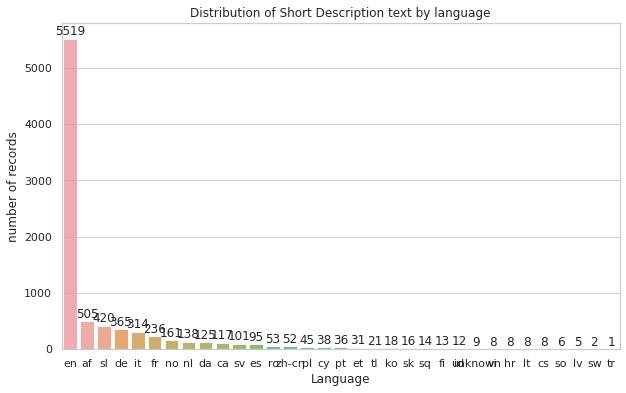

In [52]:
x = data['Short_description_L'].value_counts()
x=x.sort_values(ascending=False)
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of Short Description text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


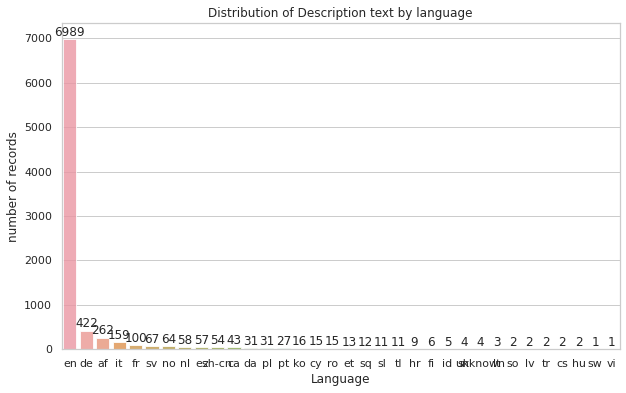

In [53]:
x = data['Description_L'].value_counts()
x=x.sort_values(ascending=False)
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of Description text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [54]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
from googletrans import Translator
translator = Translator()

#Translate the text to English
# Function to translate the text to english.
def translate_to_en(text,lang ):
  try:
    if lang == 'unknown':
        return text
    else:
        return translator.translate(text).text
  except:
    return text



In [56]:
data['en_Desc'] = data.apply(lambda x: translate_to_en(x['Description'], x['Description_L']), axis=1)

In [57]:
data['en_Short_Desc'] = data.apply(lambda x: translate_to_en(x['Short description'], x['Short_description_L']), axis=1)

### Notes:
#### While looking at data we find a lot of unnecessary text that have no input for classification.
#### We will try to visually see the patterns to that the text can be cleaned before modelling

## 1.5 Visualising different patterns 

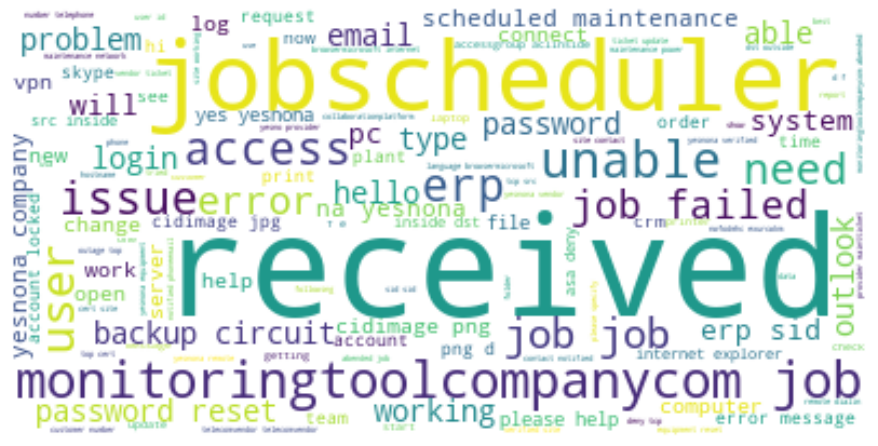

In [58]:
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join(i for i in data.en_Desc)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(12,12),facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.margins(x=0, y=0)
plt.show()

In [59]:
# Again we see a lot of text that does not add any value for our use case e.g. words like 
# 1. hello
# 2. na
# Lets write our own small stopwords relevant to domain to clean data 

In [60]:
import string 
def clean_data_domainContext(text  ):
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"received:",' ',text)
    text = re.sub(r"hi",' ',text)
    text = re.sub(r"this message was sent from an unmonitored email address",' ',text)
    text = re.sub(r"email:",' ',text)
    text = re.sub(r"email address:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"sddubject:",' ',text)
    text = re.sub(r"please do not reply to this message",' ',text)
    text = re.sub(r"select the following link to view the disclaimer in an alternate language",' ',text)
    text = re.sub(r"description problem",' ',text)
    text = re.sub(r"steps taken far",' ',text)
    text = re.sub(r"please do the needful",' ',text)
    text = re.sub(r"customer job title",' ',text)
    text = re.sub(r"sales engineer contact",' ',text)
    text = re.sub(r"please note that",' ',text)
    text = re.sub(r"please find below",' ',text)
    text = re.sub(r"hello",' ',text)
    text = re.sub(r"date and time",' ',text)
    text = re.sub(r"kindly refer mail:",' ',text)
    text = re.sub(r"name:",' ',text)
    text = re.sub(r"language:",' ',text)
    text = re.sub(r"customer number:",' ',text)
    text = re.sub(r"telephone:",' ',text)
    text = re.sub(r"summary:",' ',text)
    text = re.sub(r"sincerely",' ',text)
    text = re.sub(r"company inc",' ',text)
    text = re.sub(r"hallo",' ',text)
    text = re.sub(r"hi it team",' ',text)
    text = re.sub(r"hi team",' ',text)
    text = re.sub(r" hi ",' ',text)
    text = re.sub(r"best",' ',text)
    text = re.sub(r" na ",' ',text)
    text = re.sub(r" yes ",' ',text)
    text = re.sub(r" nona",' ',text)
    text = re.sub(r"yesnona",' ',text)
    text = re.sub(r" yes nona",' ',text)
    text = re.sub(r" kind ",' ',text)
    text = re.sub(r" regards ",' ',text)
    text = re.sub(r" good morning ",' ',text)
    text = re.sub(r" please ",' ',text)
    text = re.sub(r"monitoring_tool@company.com",'MonitoringTool',text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', ' ', text)
    text = text.translate(str.maketrans(' ',' ',string.punctuation))
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text

In [61]:
data['en_Desc'] = data['en_Desc'].apply(clean_data_domainContext)
data['en_Short_Desc'] = data['en_Short_Desc'].apply(clean_data_domainContext)

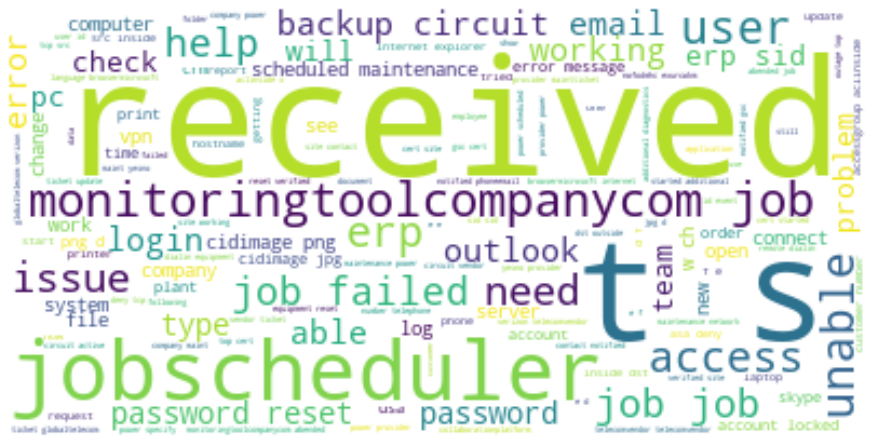

In [62]:
text = " ".join(i for i in data.en_Desc)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(12,12),facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.margins(x=0, y=0)
plt.show()

In [63]:
# There are lot of Stop words that needs to be removed
#Removing Stop words
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [64]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(sentence):
    word_tokens = word_tokenize(sentence.lower())
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
  
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)

In [65]:
data['en_Desc'] = data['en_Desc'].apply(lambda x : remove_stopwords(x) )
data['en_Short_Desc'] = data['en_Short_Desc'].apply(lambda x : remove_stopwords(x) )

In [66]:
# Visualise the word cloud

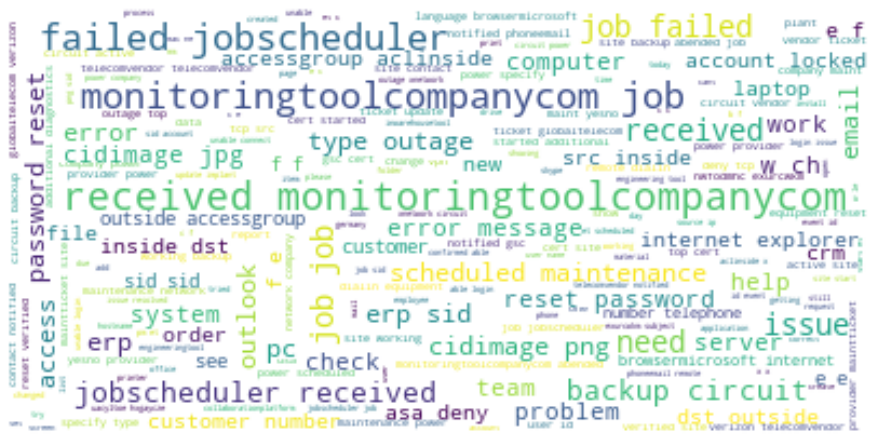

In [67]:
text = " ".join(i for i in data.en_Desc)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(12,12),facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.margins(x=0, y=0)
plt.show()

In [68]:
# Lemmatise words 
!pip install -q spacy 
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']

def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])



In [69]:
data['en_Desc'] = data['en_Desc'].apply(lemmatize_text)
data['en_Short_Desc'] = data['en_Short_Desc'].apply(lemmatize_text)

In [70]:
#combine Short description and Description
# apply function
data['en_Description'] = data.apply(lambda x: combineText(x['en_Short_Desc'], x['en_Desc']), axis=1)

In [71]:
data.head(3)

Short description                                        Description  \
0         login issue  verified user detailsemployee manager name che...   
1             outlook  received from hmjdrvpbkomuaywngmailcom hello t...   
2  cant log in to vpn  received from eylqgodmybqkwiamgmailcom hi i ca...   

              Caller Assignment group Short_description_L Description_L  \
0  spxjnwir pjlcoqds            GRP_0                  fr            en   
1  hmjdrvpb komuaywn            GRP_0                  et            en   
2  eylqgodm ybqkwiam            GRP_0                  en            en   

   Description_is_en  Short_Desc_is_en  \
0               True              True   
1               True              True   
2               True              True   

                                             en_Desc    en_Short_Desc  \
0  verify user detailsemployee manager name check...      login issue   
1  receive hmjdrvpbkomuaywngmailcom team meetings...          outlook   
2           receive eylqgodmybqkwiamgmailcom log vpn  can not log vpn   

                                      en_Description  
0  login issue verify user detailsemployee manage...  
1  outlook receive hmjdrvpbkomuaywngmailcom team ...  
2  can not log vpn receive eylqgodmybqkwiamgmailc...

## 1.6 Visualising different text features 

In [72]:
#Take only required columns 
df = data[['Assignment group' , 'en_Description']]

In [73]:
df.head()

Assignment group                                     en_Description
0            GRP_0  login issue verify user detailsemployee manage...
1            GRP_0  outlook receive hmjdrvpbkomuaywngmailcom team ...
2            GRP_0  can not log vpn receive eylqgodmybqkwiamgmailc...
3            GRP_0                          unable access hrtool page
4            GRP_0                                        skype error

In [74]:
finaldf=df.copy(deep=True)

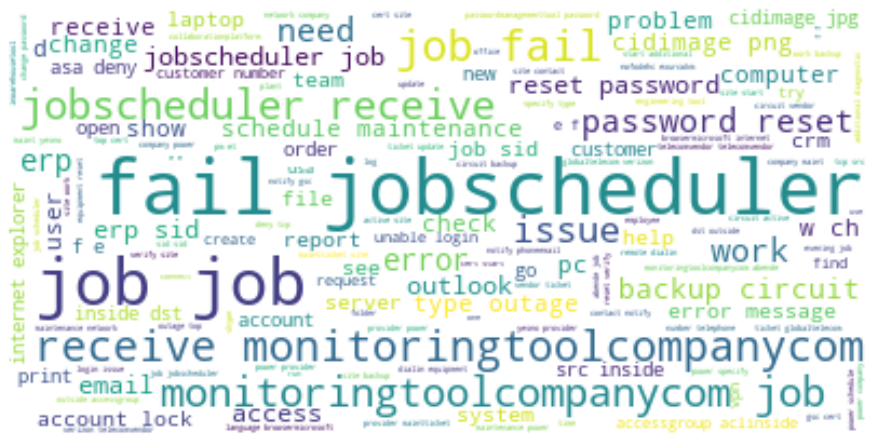

In [75]:
text = " ".join(i for i in finaldf.en_Description)
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(12,12),facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.margins(x=0, y=0)
plt.show()

In [76]:
# First Fetature to visualise is the number of words in ticket 
# If there are very less number of words in ticket it will be very difficult to classify such tickets 
print("The Description")
print("MAX str length          MIN str length ")
print(data['en_Description'].str.len().max(), "                        ", data['en_Description'].str.len().min() )

The Description
MAX str length          MIN str length 
6368                          0


In [77]:
#number of length in each Ticket
finaldf['length']=[len(text) for text in finaldf['en_Description']]
#number of words in each Ticket
finaldf['len_words'] = finaldf['en_Description'].apply(lambda x: len(x.split(" ")))

In [78]:
finaldf

Assignment group                                     en_Description  \
0               GRP_0  login issue verify user detailsemployee manage...   
1               GRP_0  outlook receive hmjdrvpbkomuaywngmailcom team ...   
2               GRP_0  can not log vpn receive eylqgodmybqkwiamgmailc...   
3               GRP_0                          unable access hrtool page   
4               GRP_0                                        skype error   
...               ...                                                ...   
8495           GRP_29  email come zz mail receive avglmrtsvhqmtiuagma...   
8496            GRP_0                            telephonysoftware issue   
8497            GRP_0        vip window password reset tifpdchb pedxruyf   
8498           GRP_62  mac ne work unable access mac ne utilities fin...   
8499           GRP_49  different program open several pc different pr...   

      length  len_words  
0        150         23  
1        124         14  
2         56          8  
3         25          4  
4         11          2  
...      ...        ...  
8495     102         14  
8496      23          2  
8497      43          6  
8498      83         13  
8499      76         12  

[8500 rows x 4 columns]

In [79]:
data_cp = finaldf.copy()
bins=[0,50,75, np.inf]
data_cp['bins']=pd.cut(data_cp.len_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])
word_distribution = data_cp.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [80]:
word_distribution

bins  counts
0    0-100    8386
1  100-300      86
2  300-500      10
3  500-800      12
4     >800       6

Text(0.5, 1.0, 'Word distribution per bin')

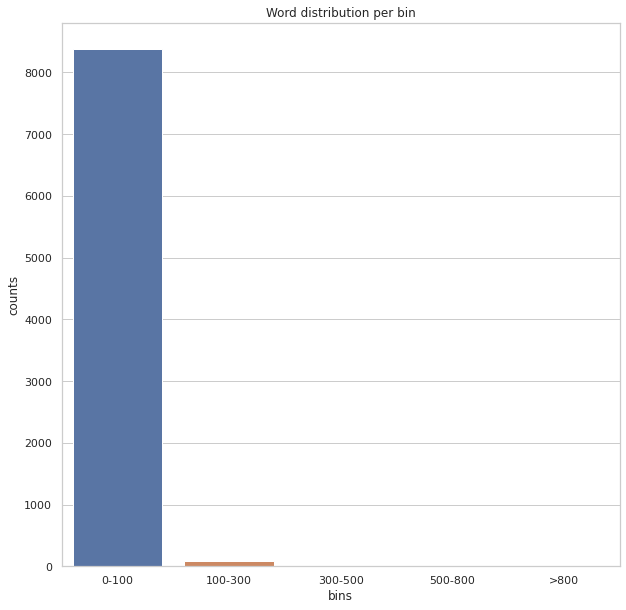

In [81]:
plt.figure(figsize=(10,10))
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

## 1.7 Text preprocessing

In [82]:
#find duplicates
finaldf.duplicated(subset=['en_Description' , 'Assignment group' ]).sum()
#There are  records which are duplicate

1685

In [83]:
#remove duplicates
finaldf.drop_duplicates(subset=['en_Description' ,'Assignment group' ] , keep='first' , inplace=True)

In [84]:
finaldf.shape

(6815, 4)

In [85]:
#since these single word Decription does not help in predection , we can drop them
finaldf.drop(finaldf[finaldf['len_words'] < 2].index, inplace = True)

In [86]:
finaldf.shape

(6810, 4)

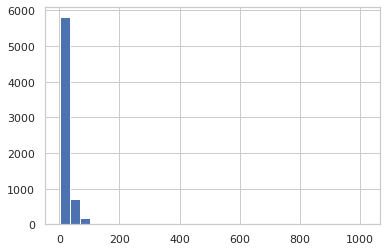

In [87]:
finaldf['len_words'].hist(bins=30);

In [88]:
!pip install -q pyLDAvis 

     |████████████████████████████████| 1.7 MB 4.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done


In [89]:
# Gensim
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models 
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [90]:
#to process the simple_process gensim package as input needed as string 
corpus=finaldf.en_Description.values.tolist()

In [91]:
corpus[1]

'outlook receive hmjdrvpbkomuaywngmailcom team meetingsskype meeting etc appear outlook calendar somebody advise correct kind'

In [92]:
#Convert  Combined text from each sentense to the words. use of simple_process as it tokenize() internally
#https://radimrehurek.com/gensim/utils.html#gensim.utils.simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(corpus))

In [93]:
print(data_words[1])

['outlook', 'receive', 'team', 'meetingsskype', 'meeting', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'advise', 'correct', 'kind']


### NGram

In [94]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
def get_top_n_grams(corpus, top_n=None, ngram_range=(1,1), stopwords=None):
    vec = CountVectorizer(ngram_range = ngram_range, stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words= bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:top_n]

#### Unigram

In [95]:
top_n=50
ngram_range=(1,1)
uni_grams = get_top_n_grams(finaldf.en_Description, top_n, ngram_range, stopwords=stopwords.words('english'))
unigram_df = pd.DataFrame(uni_grams, columns=['words','count'])
unigram_df.head(10)

words  count
0   receive   1795
1  password   1570
2       erp   1475
3      user   1452
4     issue   1285
5    access   1159
6      work   1063
7     error   1024
8     reset   1012
9       sid    995

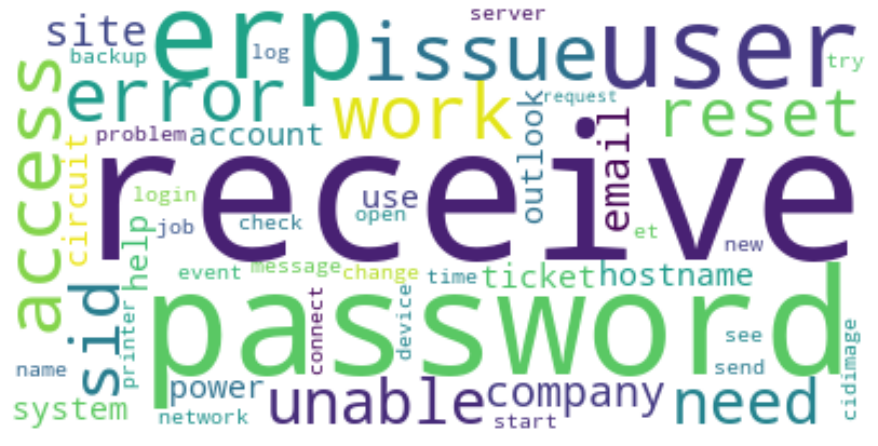

In [96]:
text = " ".join(unigram_df.words.str.strip())
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(12,12),facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.margins(x=0, y=0)
plt.show()

#### Bigram

In [97]:
def merge_words(text ):
    text = re.sub(r' ', '-',text)
    return text

In [98]:
top_n=50
bigram_range = (2,2)

bi_grams = get_top_n_grams(finaldf.en_Description, top_n,bigram_range, stopwords=stopwords.words('english'))
bi_grams_df = pd.DataFrame(bi_grams, columns=['words','count'])
bi_grams_df.head(10)

words  count
0        backup circuit    441
1        reset password    337
2        password reset    320
3           type outage    286
4  schedule maintenance    286
5          cidimage png    270
6     fail jobscheduler    269
7         error message    253
8               erp sid    208
9          cidimage jpg    208

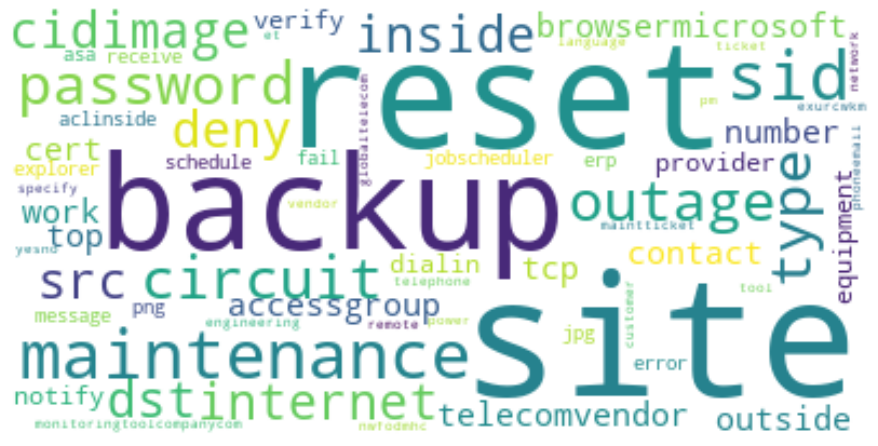

In [99]:
text = " ".join(bi_grams_df.words.str.strip())
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(12,12),facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.margins(x=0, y=0)
plt.show()

#### Trigram

In [100]:
top_n=50
trigram_range = (3,3)

tri_grams = get_top_n_grams(finaldf.en_Description, top_n,trigram_range, stopwords=stopwords.words('english'))
tri_grams_df = pd.DataFrame(tri_grams, columns=['words','count'])
tri_grams_df.head(10)

words  count
0                      src inside dst    185
1                  inside dst outside    164
2             dst outside accessgroup    164
3       outside accessgroup aclinside    164
4  browsermicrosoft internet explorer    158
5           customer number telephone    158
6  language browsermicrosoft internet    157
7                        asa deny tcp    153
8                        deny tcp src    153
9                      tcp src inside    153

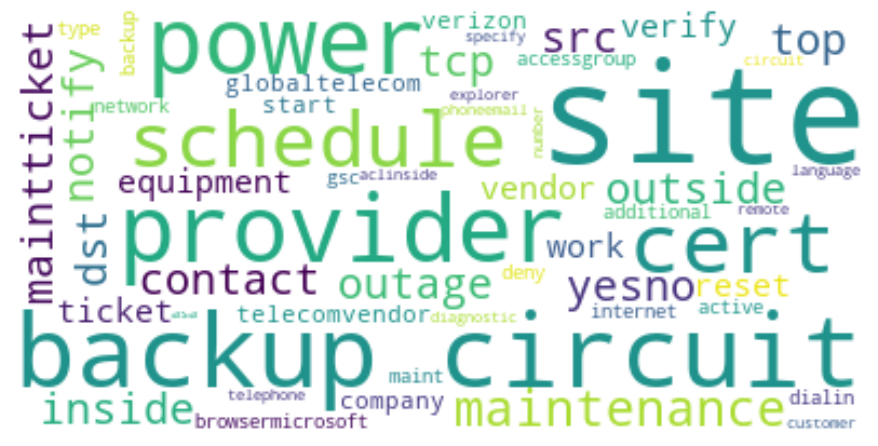

In [101]:
text = " ".join(tri_grams_df.words.str.strip())
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(12,12),facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.margins(x=0, y=0)
plt.show()

In [102]:
# Build the bigram and trigram models
#https://radimrehurek.com/gensim/models/phrases.html
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [103]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [104]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

**WordCloud **

In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [106]:
wordclouds=' '.join(map(str, data_words_bigrams)) 

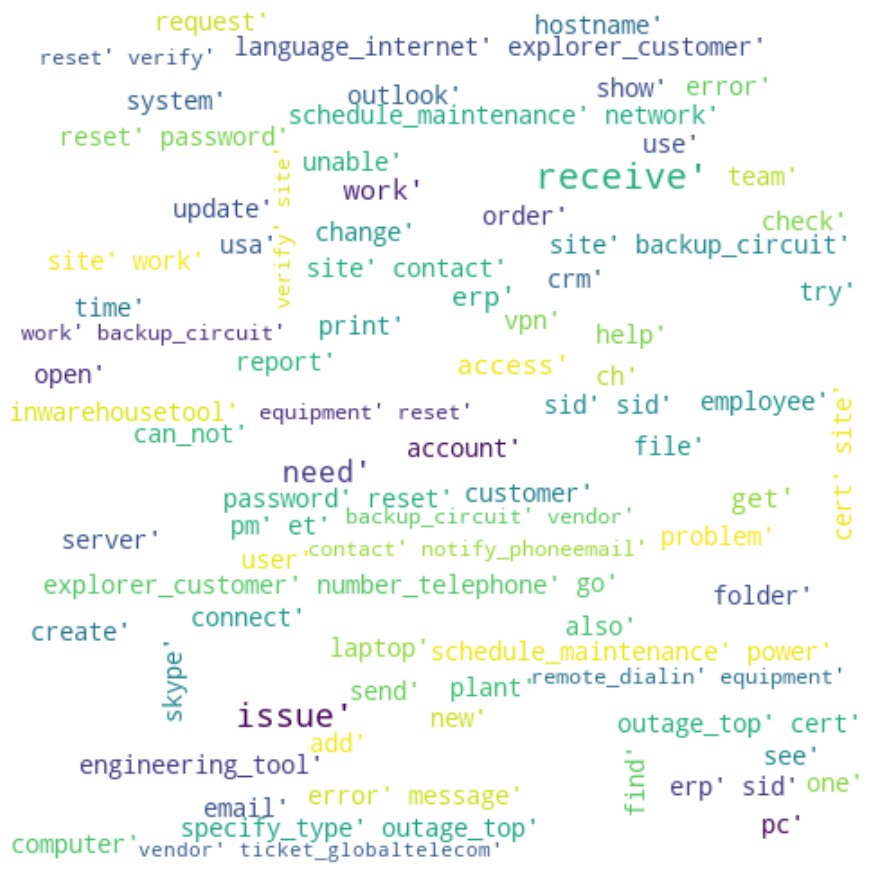

In [107]:
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10 , background_color="white").generate(wordclouds)
plt.figure(figsize=(12,12),facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.margins(x=0, y=0)
plt.show()

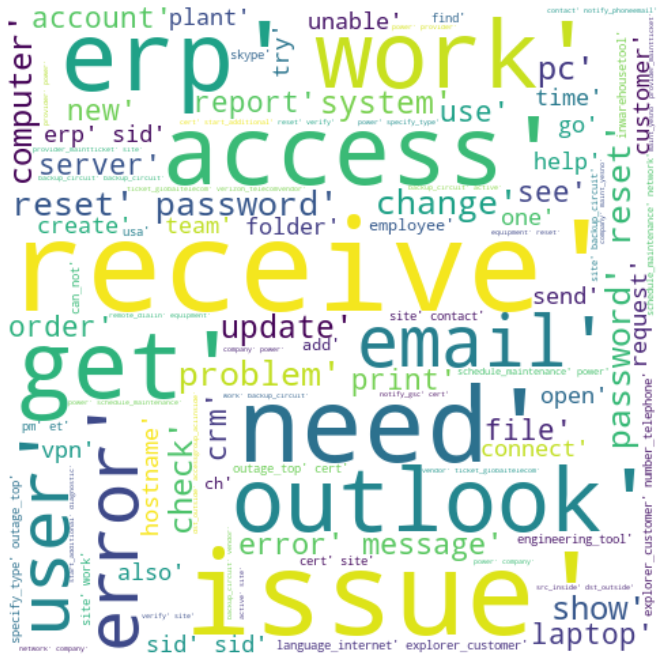

In [108]:
#check for the word count 100)
wordcloud_2 = WordCloud(width=480, height=480, max_words=100 , background_color="white").generate(wordclouds)
plt.figure(figsize=(12,12),facecolor = None )
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [109]:
#Copying to new dataframe to create wordclouds on target class

new_df = finaldf.copy()
new_df['words'] = data_words_bigrams
new_df.head()

Assignment group                                     en_Description  length  \
0            GRP_0  login issue verify user detailsemployee manage...     150   
1            GRP_0  outlook receive hmjdrvpbkomuaywngmailcom team ...     124   
2            GRP_0  can not log vpn receive eylqgodmybqkwiamgmailc...      56   
3            GRP_0                          unable access hrtool page      25   
4            GRP_0                                        skype error      11   

   len_words                                              words  
0         23  [login, issue, verify, user, detailsemployee_m...  
1         14  [outlook, receive, team, meetingsskype, meetin...  
2          8             [can_not, log, vpn, receive, log, vpn]  
3          4                     [unable, access, hrtool, page]  
4          2                                     [skype, error]

In [110]:
#Sorting based on frequency of target class Assignment group

value = new_df['Assignment group'].value_counts().sort_values(ascending=False).index
value

Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_2', 'GRP_19', 'GRP_3',
       'GRP_13', 'GRP_14', 'GRP_25', 'GRP_33', 'GRP_29', 'GRP_4', 'GRP_18',
       'GRP_16', 'GRP_10', 'GRP_6', 'GRP_9', 'GRP_7', 'GRP_17', 'GRP_31',
       'GRP_34', 'GRP_26', 'GRP_5', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_30',
       'GRP_15', 'GRP_42', 'GRP_20', 'GRP_22', 'GRP_45', 'GRP_11', 'GRP_21',
       'GRP_1', 'GRP_23', 'GRP_48', 'GRP_62', 'GRP_47', 'GRP_27', 'GRP_39',
       'GRP_37', 'GRP_44', 'GRP_36', 'GRP_50', 'GRP_60', 'GRP_65', 'GRP_53',
       'GRP_52', 'GRP_55', 'GRP_51', 'GRP_49', 'GRP_46', 'GRP_59', 'GRP_43',
       'GRP_32', 'GRP_66', 'GRP_68', 'GRP_63', 'GRP_38', 'GRP_58', 'GRP_56',
       'GRP_57', 'GRP_54', 'GRP_69', 'GRP_71', 'GRP_72', 'GRP_61', 'GRP_64',
       'GRP_67', 'GRP_35', 'GRP_70', 'GRP_73'],
      dtype='object')

In [111]:
# Creating a function for wordcloud
def wordcloud_grp(f, x):
    wordclouds_0=' '.join(map(str, f))

    wc = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10, max_words=50, background_color="grey").generate(wordclouds_0)
    plt.figure(figsize=(12,12) )
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common 50 words of {}".format(x))
    plt.margins(x=0, y=0)
    plt.show()

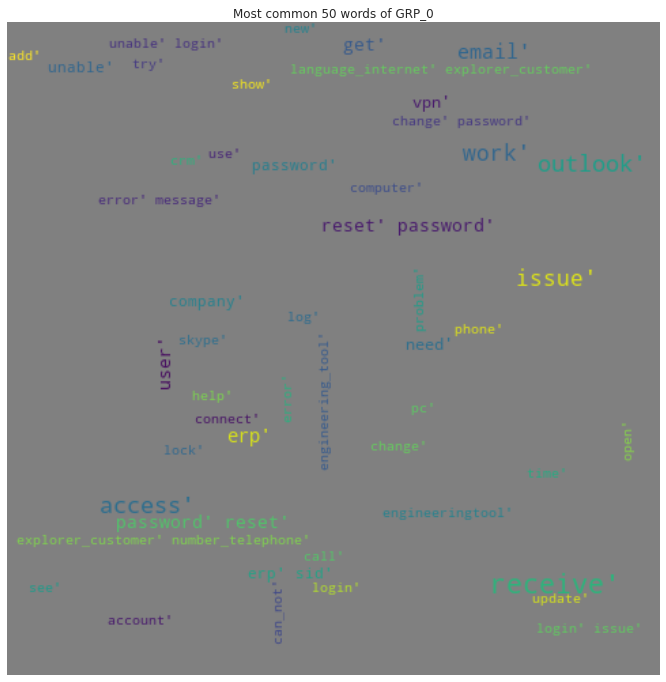

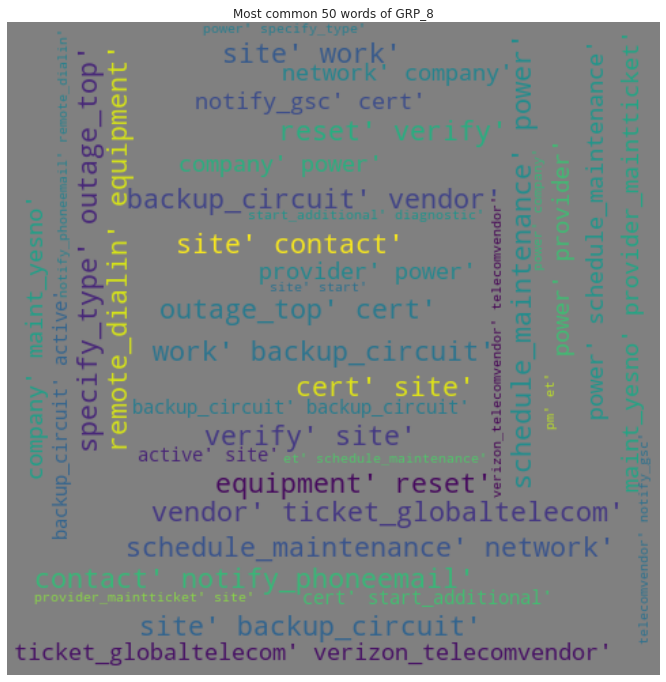

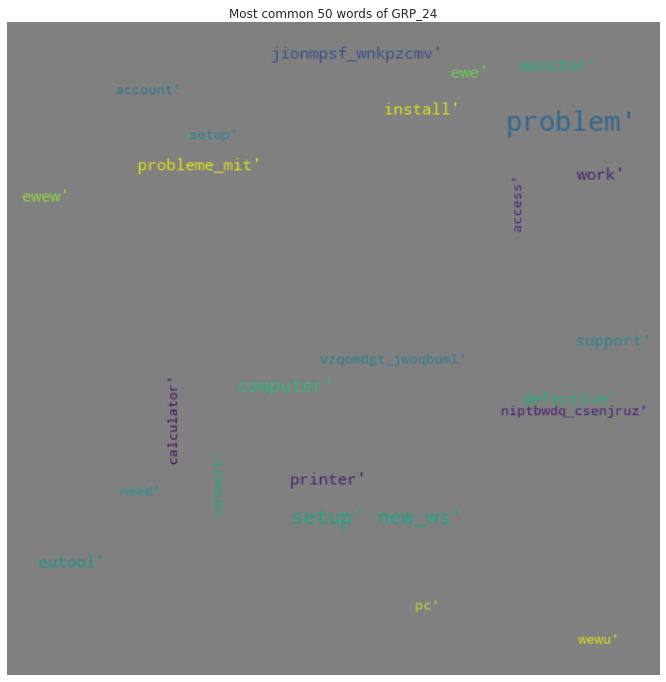

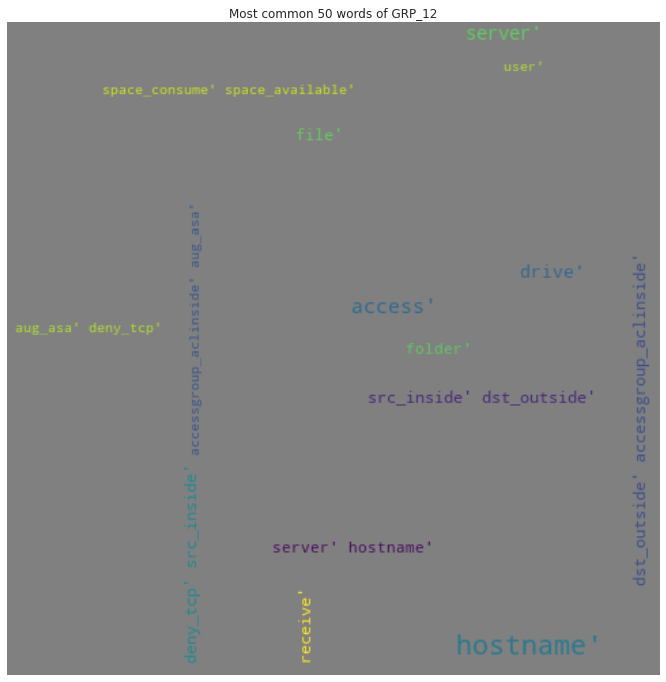

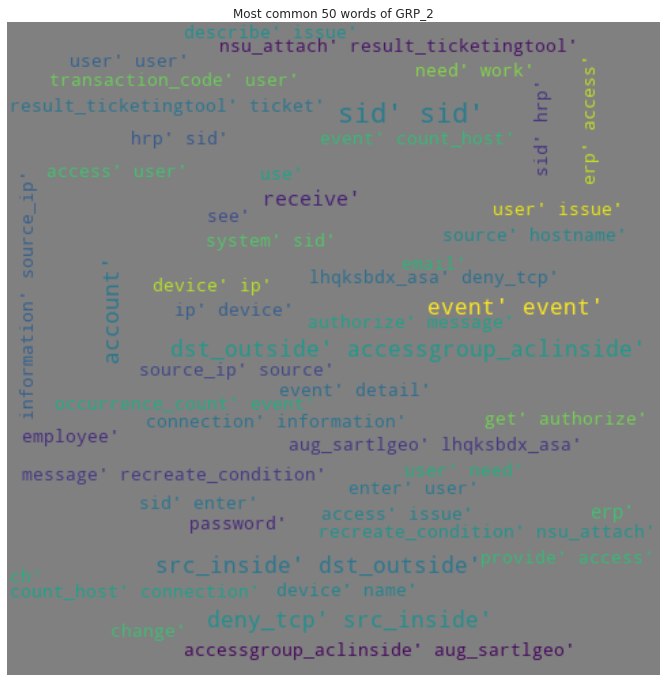

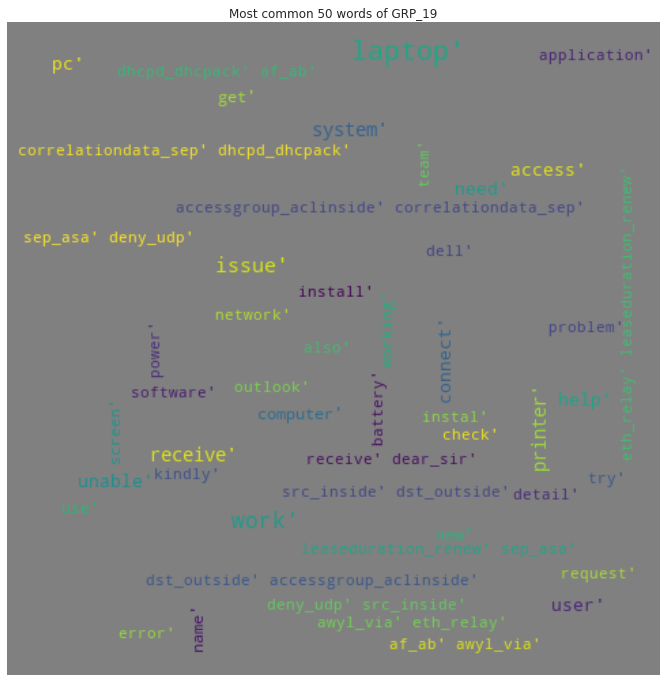

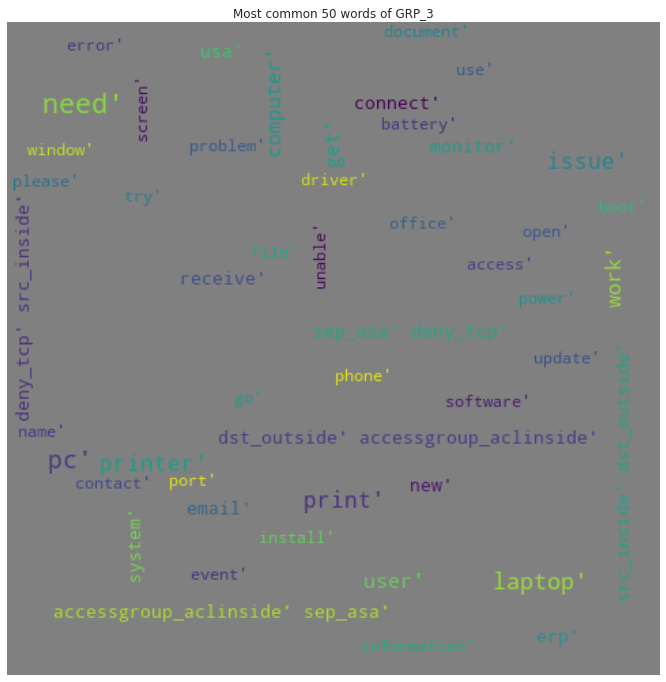

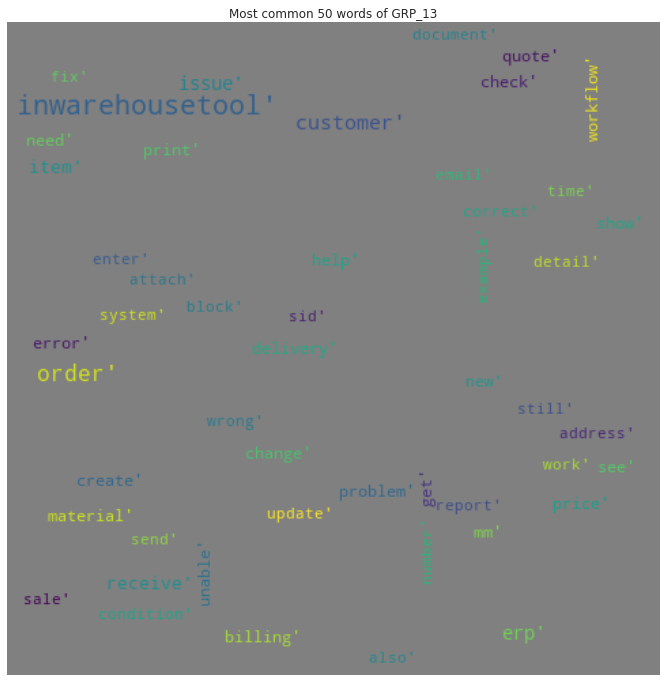

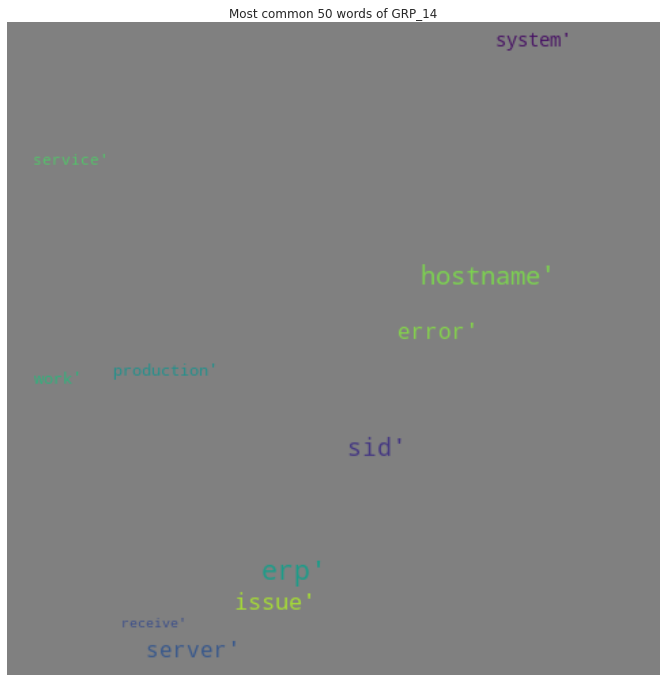

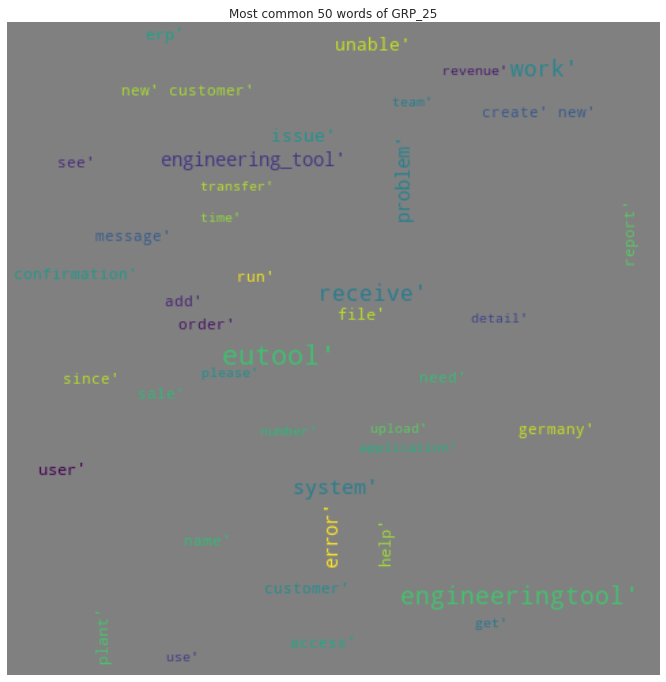

In [112]:
#for loop to pass the top 10 Assignment groups

for i in range(10):

    Grp = new_df[new_df ['Assignment group'] == value[i]]
    Grp = Grp['words']
    wordcloud_grp(Grp,value[i])

In [113]:
data_cp = finaldf.copy()

In [114]:
data_cp.describe().transpose()

count       mean         std  min    25%    50%    75%     max
length     6810.0  165.06696  310.222553  6.0  43.25  102.0  188.0  6368.0
len_words  6810.0   22.91072   46.608675  2.0   6.00   14.0   25.0  1014.0

In [115]:
bins=[0,50,75, np.inf]
data_cp['bins']=pd.cut(data_cp.len_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])
word_distribution = data_cp.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [116]:
word_distribution

bins  counts
0    0-100    6697
1  100-300      85
2  300-500      10
3  500-800      12
4     >800       6

Text(0.5, 1.0, 'Word distribution per bin')

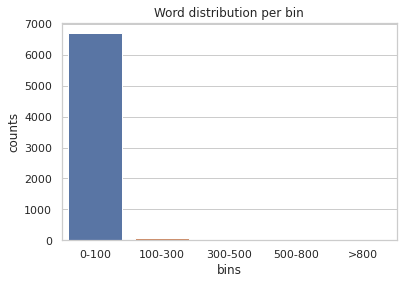

In [117]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

Most of the descrption of the problems raised by callers are short with in 0-100 words
Few items are with bit descriptive

In [118]:
finaldf["Assignment group"].nunique()

74

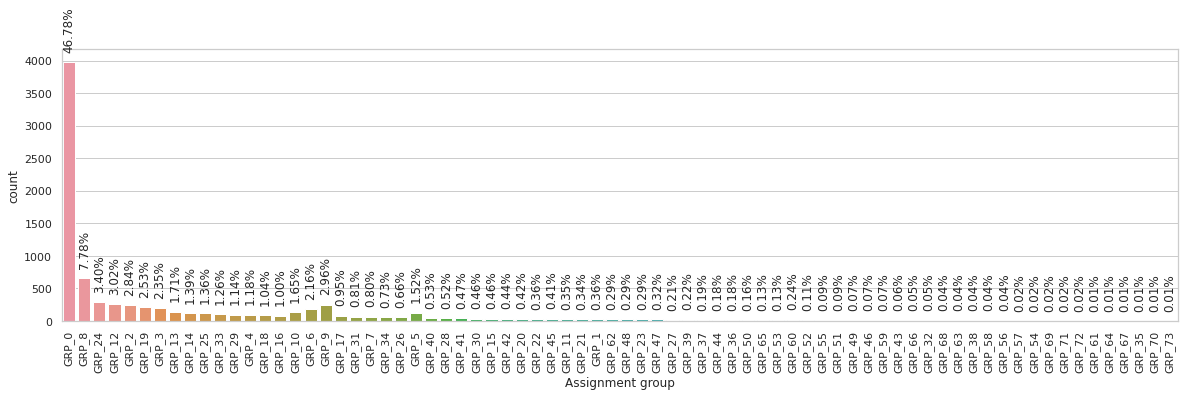

In [119]:
 #Plot to visualize the percentage data distribution across different groups after preprocessing 
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=data, order=finaldf["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(data.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

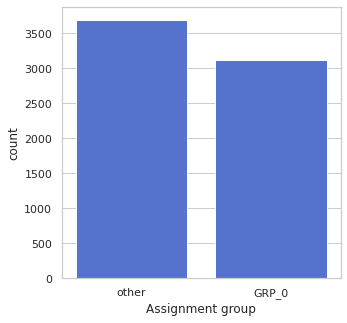

In [120]:
# Create the Dataset for classifying GRP_0
TicketGRP0DF = finaldf.copy()
TicketGRP0DF['Assignment group']=TicketGRP0DF['Assignment group'].apply(lambda x : 'other' if x != 'GRP_0'  else x)

descending_order = TicketGRP0DF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(5,5))
sns.countplot(x='Assignment group', data=TicketGRP0DF, color='royalblue',order=descending_order)

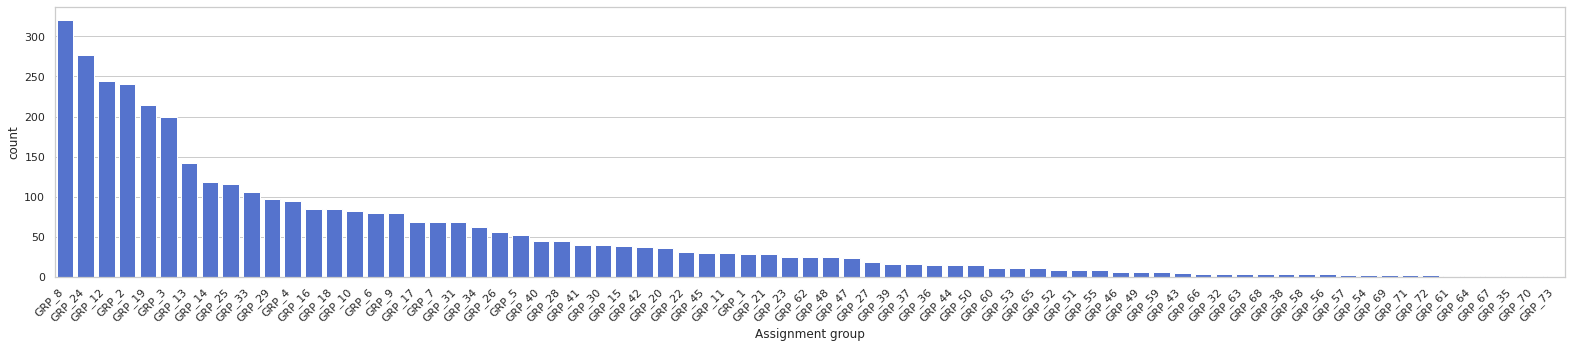

In [121]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
itTicketOthersDF = finaldf[finaldf['Assignment group'] != 'GRP_0']

descending_order = itTicketOthersDF['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketOthersDF, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Observation**

There is high imbalance within the other group, For machine learning we can take Assignment Groups where there are more that 15 Samples rest we can combine to form new Group.
If ticket is pridected for new group we can route the ticket for manual classification until we have suifficent data for those groups.

Once we have more data for remaining group we can re-train by including that group . 


# 2. Model Building


In [122]:
counts = finaldf['Assignment group'].value_counts()
res = finaldf[finaldf['Assignment group'].isin(counts[counts >= 90 ].index)]
print("Groups more than 20 Samples: " , res['Assignment group'].nunique())
res['Assignment group'].value_counts()

Groups more than 20 Samples:  13


GRP_0     3117
GRP_8      321
GRP_24     277
GRP_12     244
GRP_2      241
GRP_19     214
GRP_3      200
GRP_13     142
GRP_14     118
GRP_25     116
GRP_33     106
GRP_29      97
GRP_4       95
Name: Assignment group, dtype: int64

Data from Assignment Group other than GRP_0 is highly unbalanced .

Assignnment Groups with sample more than or equal to 15 are 42.

Assignnment Groups with sample less than 15 are 31, which can be combined as 'GRPL15' form a new Group. Which can be further classified manually currently

Once we collect more data for groups with less sample we can re-train the model with explict groups.

In [123]:
#Combining Assignment Group for Data with Samples less than 15
grp_lst = res['Assignment group'].unique().tolist()
grp_lst

['GRP_0',
 'GRP_3',
 'GRP_4',
 'GRP_8',
 'GRP_12',
 'GRP_13',
 'GRP_14',
 'GRP_19',
 'GRP_2',
 'GRP_24',
 'GRP_25',
 'GRP_29',
 'GRP_33']

In [124]:
#Create the copy on dataset to update new column values
u_data = finaldf.copy()

In [125]:
u_data["Assignment group"] = u_data["Assignment group"].apply(lambda x : x if x in grp_lst  else 'GRP_MANUAL')

In [126]:
u_data["Assignment group"].value_counts()

GRP_0         3117
GRP_MANUAL    1522
GRP_8          321
GRP_24         277
GRP_12         244
GRP_2          241
GRP_19         214
GRP_3          200
GRP_13         142
GRP_14         118
GRP_25         116
GRP_33         106
GRP_29          97
GRP_4           95
Name: Assignment group, dtype: int64

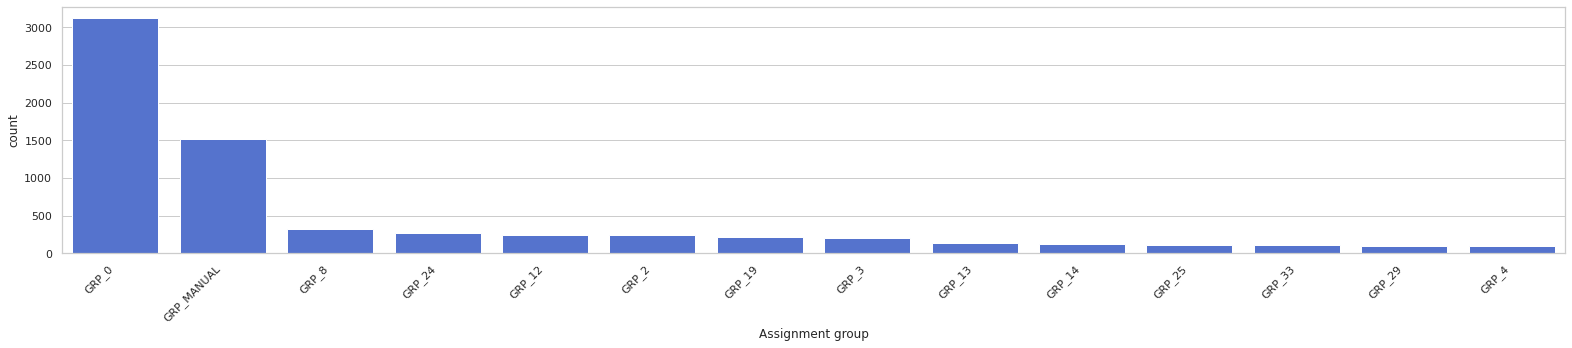

In [127]:
descending_order = u_data['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=u_data, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 2.1 upsampling

In [128]:
maxOthers = u_data['Assignment group'].value_counts().max()
maxOthers 

3117

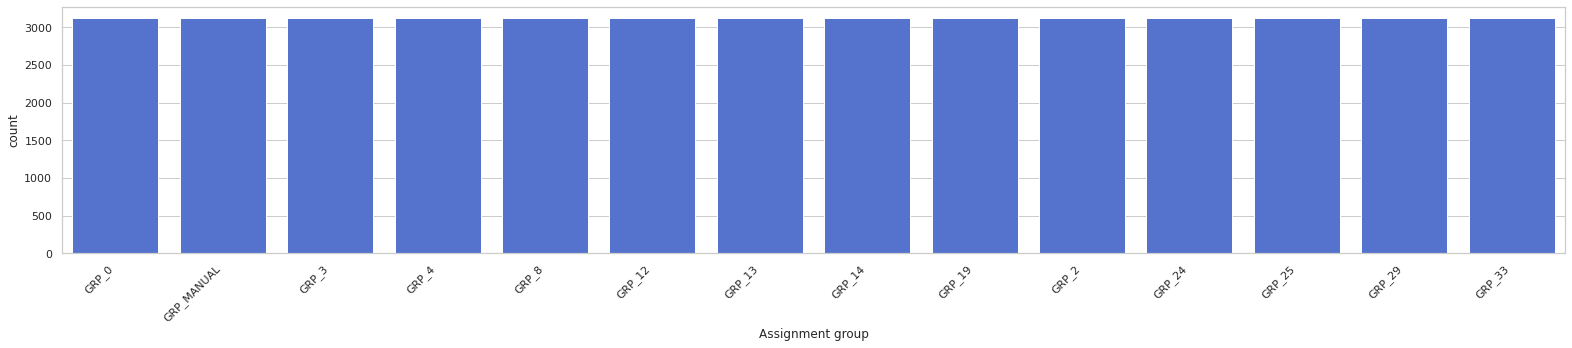

In [129]:
from sklearn.utils import resample
# Treat the imbalnce in the itTicketDF dataset by resampling to 661.This is for us to try creating a single model which use the whiole dataset & verify the performance
itTicketDF_resampled = u_data[0:0]
for grp in u_data['Assignment group'].unique():
    itTicketGrpDF = u_data[u_data['Assignment group'] == grp]
    resampled = resample(itTicketGrpDF, replace=True, n_samples=int(maxOthers), random_state=123)
    itTicketDF_resampled = itTicketDF_resampled.append(resampled)

descending_order = itTicketDF_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=itTicketDF_resampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Basic Machine Learning Models**

MultinomialNB

Random Classifier

Support Vector Machine

Xgboost

LogisticRegression

In [130]:
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore') 

## 2.2 X, y split with upsampled data

In [131]:
#Dataset with resampled & Combined Group where Samples are less the 90

x = itTicketDF_resampled['en_Description']
y = itTicketDF_resampled['Assignment group']

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels 
encoder.fit(y)
y = encoder.transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=13,stratify=y , shuffle=True)
X_test_final = X_test.copy()
y_test_final = y_test.copy()

## 2.3 X, y split with Original data

In [132]:
df_org = finaldf[finaldf['Assignment group'].map(finaldf['Assignment group'].value_counts()) > 1]
x_org = df_org['en_Description']
y_org = df_org['Assignment group']
encoder_org = preprocessing.LabelEncoder()
# encoding org train labels 
encoder_org.fit(y_org)
y_org = encoder_org.transform(y_org)

from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(x_org, y_org, test_size= 0.2, random_state=13,stratify=y_org , shuffle=True)
X_test_final = X_test_org.copy()
y_test_final = y_test_org.copy()

In [133]:
cnames=["Classifier", "Accuracy", "f1_score","Precision", "Recall"]
log = pd.DataFrame(columns=cnames, dtype=object)
log_org = pd.DataFrame(columns=cnames, dtype=object)

In [134]:
from sklearn.feature_extraction.text import CountVectorizer

# 3. Machine Learning Models

## 3.1 MultinomialNB

### 3.1.1 MultinomialNB upsampled data

In [135]:
##Naive Bayes classifier for multinomial models
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

#### Multi class version of logrithmetic loss metric

In [136]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [137]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)
log_cols=["Classifier", "Accuracy", "f1_score","Precision", "Recall"]
predictions = nb.predict_proba(X_test)
print('Naive Bayes classifier for Upsampled Data')
print('\n')
print('accuracy %s' % accuracy_score(y_test , y_pred)) 
print('f1 score %s' % f1_score(y_test , y_pred,average='weighted')) 
print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))
print('Precision: %.3f' % precision_score(y_test,y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_test,y_pred,average='weighted'))

#Classification Report for Upsample Data
print('Classification Report for Naive Bayes classifier - Upsampled Data')
y_test_inv = encoder.inverse_transform(y_test)
y_pred_inv = encoder.inverse_transform(y_pred)
print(classification_report(y_test_inv, y_pred_inv))

print(confusion_matrix(y_test,y_pred))

Naive Bayes classifier for Upsampled Data


accuracy 0.8901237396883593
f1 score 0.8838404197728508
logloss: 0.467 
Precision: 0.890
Recall: 0.890
Classification Report for Naive Bayes classifier - Upsampled Data
              precision    recall  f1-score   support

       GRP_0       0.77      0.65      0.71       624
      GRP_12       0.90      0.93      0.91       623
      GRP_13       0.90      0.99      0.94       624
      GRP_14       0.89      0.95      0.92       623
      GRP_19       0.88      0.87      0.87       623
       GRP_2       0.85      0.97      0.91       623
      GRP_24       0.98      0.98      0.98       624
      GRP_25       0.91      1.00      0.96       623
      GRP_29       0.93      0.97      0.95       623
       GRP_3       0.90      0.90      0.90       623
      GRP_33       0.92      0.99      0.96       624
       GRP_4       0.90      0.88      0.89       623
       GRP_8       0.80      0.90      0.85       624
  GRP_MANUAL       0.92      0

### 3.1.2 MultinomialNB Original data

In [138]:
nb_org = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb_org.fit(X_train_org, y_train_org)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [139]:
y_pred_org = nb_org.predict(X_test_org)
log_cols=["Classifier", "Accuracy", "f1_score","Precision", "Recall"]
predictions_org = nb_org.predict_proba(X_test_org)
print('Naive Bayes classifier for Original Data')
print('\n')
print('accuracy %s' % accuracy_score(y_test_org , y_pred_org)) 
print('f1 score %s' % f1_score(y_test_org , y_pred_org,average='weighted' )) 
print ("logloss: %0.3f " % multiclass_logloss(y_test_org,predictions_org))
print('Precision: %.3f' % precision_score(y_test_org,y_pred_org,average='weighted'))
print('Recall: %.3f' % recall_score(y_test_org,y_pred_org,average='weighted'))

#Classification Report for Original Data
print('Classification Report - Naive Bayes classifier for Original Data')
y_test_inv_org = encoder_org.inverse_transform(y_test_org)
y_pred_inv_org = encoder_org.inverse_transform(y_pred_org)
print(classification_report(y_test_inv_org, y_pred_inv_org))

print(confusion_matrix(y_test_org,y_pred_org))

Naive Bayes classifier for Original Data


accuracy 0.5106539309331374
f1 score 0.364003552022742
logloss: 2.766 
Precision: 0.326
Recall: 0.511
Classification Report - Naive Bayes classifier for Original Data
              precision    recall  f1-score   support

       GRP_0       0.50      1.00      0.67       623
       GRP_1       0.00      0.00      0.00         6
      GRP_10       0.00      0.00      0.00        16
      GRP_11       0.00      0.00      0.00         6
      GRP_12       0.47      0.16      0.24        49
      GRP_13       0.00      0.00      0.00        28
      GRP_14       0.00      0.00      0.00        24
      GRP_15       0.00      0.00      0.00         8
      GRP_16       0.00      0.00      0.00        17
      GRP_17       0.00      0.00      0.00        14
      GRP_18       0.00      0.00      0.00        17
      GRP_19       0.00      0.00      0.00        43
       GRP_2       0.33      0.02      0.04        48
      GRP_20       0.00      0.00

In [140]:
MultinomialNB = pd.DataFrame([["MultinomialNB",accuracy_score(y_test ,y_pred),f1_score(y_test ,y_pred,average='weighted'),precision_score(y_test, y_pred,average='weighted'),recall_score(y_test, y_pred,average='weighted')]], columns=log_cols)

In [141]:
MultinomialNB_org = pd.DataFrame([["MultinomialNB",accuracy_score(y_test_org ,y_pred_org),f1_score(y_test_org ,y_pred_org,average='weighted'),precision_score(y_test_org, y_pred_org,average='weighted'),recall_score(y_test_org, y_pred_org,average='weighted')]], columns=log_cols)

## 3.2 Support Vector Machine

### 3.2.1Support Vector Machine upsampled data

In [142]:
##Linear Support Vector Machine
from sklearn import svm

pipe_svm = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
            ('clf', svm.SVC(random_state=42))])
pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC(random_state=42))])

In [143]:
y_pred = pipe_svm.predict(X_test)

print('Support Vector Machine for Upsampled Data')
print('\n')
print('accuracy %s' % accuracy_score(y_test , y_pred )) 
print('f1 score %s' % f1_score(y_test , y_pred ,average='weighted')) 

#print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))
print('Precision: %.3f' % precision_score(y_test,y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_test,y_pred,average='weighted'))

#Classification Report for Upsample Data
print('Classification Report - Support Vector Machine for Upsampled Data')
y_test_inv = encoder.inverse_transform(y_test)
y_pred_inv = encoder.inverse_transform(y_pred)
print(classification_report(y_test_inv, y_pred_inv))

print(confusion_matrix(y_test,y_pred))

SVM_clf = pd.DataFrame([["SVM",accuracy_score(y_test , y_pred),f1_score(y_test , y_pred,average='weighted'),precision_score(y_test, y_pred,average='weighted'),recall_score(y_test, y_pred,average='weighted')]], columns=log_cols)

Support Vector Machine for Upsampled Data


accuracy 0.9778872593950504
f1 score 0.9776474349961494
Precision: 0.978
Recall: 0.978
Classification Report - Support Vector Machine for Upsampled Data
              precision    recall  f1-score   support

       GRP_0       0.94      0.88      0.91       624
      GRP_12       0.97      0.99      0.98       623
      GRP_13       1.00      0.99      1.00       624
      GRP_14       0.98      1.00      0.99       623
      GRP_19       0.98      1.00      0.99       623
       GRP_2       0.99      0.99      0.99       623
      GRP_24       1.00      1.00      1.00       624
      GRP_25       1.00      1.00      1.00       623
      GRP_29       0.97      1.00      0.98       623
       GRP_3       0.99      1.00      1.00       623
      GRP_33       1.00      1.00      1.00       624
       GRP_4       0.99      0.97      0.98       623
       GRP_8       0.96      0.97      0.96       624
  GRP_MANUAL       0.92      0.89      0.91   

### 3.2.2 Support vector Machine  Original Data

In [144]:
##Linear Support Vector Machine for Orginial Data


svc_org = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
            ('clf', svm.SVC(random_state=42))])
svc_org.fit(X_train_org, y_train_org)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC(random_state=42))])

In [145]:
y_pred_org = svc_org.predict(X_test_org)
print('Support Vector Machine for Original Data')
print('\n')
print('accuracy %s' % accuracy_score(y_test_org , y_pred_org )) 
print('f1 score %s' % f1_score(y_test_org , y_pred_org ,average='weighted')) 

print('Precision: %.3f' % precision_score(y_test_org,y_pred_org,average='weighted'))
print('Recall: %.3f' % recall_score(y_test_org,y_pred_org,average='weighted'))

#Classification Report for Original Data
print('Classification Report - Support Vector Machine for Original Data')
y_test_inv_org = encoder_org.inverse_transform(y_test_org)
y_pred_inv_org = encoder_org.inverse_transform(y_pred_org)
print(classification_report(y_test_inv_org, y_pred_inv_org))

print(confusion_matrix(y_test_org,y_pred_org))

SVM__org = pd.DataFrame([["SVM",accuracy_score(y_test_org , y_pred_org),f1_score(y_test_org , y_pred_org,average='weighted'),precision_score(y_test_org, y_pred_org,average='weighted'),recall_score(y_test_org, y_pred_org,average='weighted')]], columns=log_cols)

Support Vector Machine for Original Data


accuracy 0.585598824393828
f1 score 0.48462255888193695
Precision: 0.516
Recall: 0.586
Classification Report - Support Vector Machine for Original Data
              precision    recall  f1-score   support

       GRP_0       0.57      0.99      0.72       623
       GRP_1       1.00      0.17      0.29         6
      GRP_10       0.00      0.00      0.00        16
      GRP_11       0.00      0.00      0.00         6
      GRP_12       0.56      0.45      0.50        49
      GRP_13       0.83      0.36      0.50        28
      GRP_14       0.88      0.29      0.44        24
      GRP_15       0.00      0.00      0.00         8
      GRP_16       0.00      0.00      0.00        17
      GRP_17       0.86      0.86      0.86        14
      GRP_18       1.00      0.12      0.21        17
      GRP_19       0.56      0.12      0.19        43
       GRP_2       0.65      0.27      0.38        48
      GRP_20       0.00      0.00      0.00     

## 3.3 Random Classifier

### 3.3.1 Random Classifier Upsampled

In [146]:
##Ramdom Classifier
from sklearn.ensemble import RandomForestClassifier

rdm_clf =  Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
            ('clf', RandomForestClassifier(random_state=42))])
rdm_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(random_state=42))])

In [147]:
y_pred = rdm_clf.predict(X_test)
print('Random Classifier for Upsampled Data')
print('\n')
print('accuracy %s' % accuracy_score(y_test , y_pred)) 
print('f1 score %s' % f1_score(y_test, y_pred,average='weighted')) 

print('Precision: %.3f' % precision_score(y_test,y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_test,y_pred,average='weighted'))

#Classification Report for Upsample Data
print('Classification Report - Random Classifier for Upsampled Data')
y_test_inv = encoder.inverse_transform(y_test)
y_pred_inv = encoder.inverse_transform(y_pred)
print(classification_report(y_test_inv, y_pred_inv))

print(confusion_matrix(y_test,y_pred))


rndClassifier = pd.DataFrame([["Random Classifier",accuracy_score(y_test , y_pred),f1_score(y_test ,y_pred,average='weighted'),precision_score(y_test , y_pred,average='weighted'),recall_score(y_test, y_pred,average='weighted')]], columns=log_cols)

Random Classifier for Upsampled Data


accuracy 0.9847616865261228
f1 score 0.9845930953731974
Precision: 0.985
Recall: 0.985
Classification Report - Random Classifier for Upsampled Data
              precision    recall  f1-score   support

       GRP_0       0.92      0.96      0.94       624
      GRP_12       0.98      0.99      0.99       623
      GRP_13       1.00      0.99      0.99       624
      GRP_14       0.99      1.00      1.00       623
      GRP_19       0.99      1.00      0.99       623
       GRP_2       1.00      0.99      1.00       623
      GRP_24       1.00      1.00      1.00       624
      GRP_25       1.00      1.00      1.00       623
      GRP_29       0.97      1.00      0.98       623
       GRP_3       0.99      1.00      1.00       623
      GRP_33       1.00      1.00      1.00       624
       GRP_4       1.00      1.00      1.00       623
       GRP_8       0.98      0.98      0.98       624
  GRP_MANUAL       0.97      0.88      0.92       624

 

### 3.3.2 Random Classifier Original Data

In [148]:
##Random Classifier for org data


rnd_org = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
            ('clf', RandomForestClassifier(random_state=42))])
rnd_org.fit(X_train_org, y_train_org)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(random_state=42))])

In [149]:
y_pred_org = rnd_org.predict(X_test_org)
print('Random Classifier for original Data')
print('\n')
print('accuracy %s' % accuracy_score(y_test_org , y_pred_org)) 
print('f1 score %s' % f1_score(y_test_org, y_pred_org,average='weighted')) 

print('Precision: %.3f' % precision_score(y_test_org,y_pred_org,average='weighted'))
print('Recall: %.3f' % recall_score(y_test_org,y_pred_org,average='weighted'))

#Classification Report for Original Data
print('Classification Report- Random Classifier for original Data')
y_test_inv_org = encoder_org.inverse_transform(y_test_org)
y_pred_inv_org = encoder_org.inverse_transform(y_pred_org)
print(classification_report(y_test_inv_org, y_pred_inv_org))

print(confusion_matrix(y_test_org,y_pred_org))


RClassifier_org = pd.DataFrame([["Random Classifier",accuracy_score(y_test_org , y_pred_org),f1_score(y_test_org ,y_pred_org,average='weighted'),precision_score(y_test_org , y_pred_org,average='weighted'),recall_score(y_test_org, y_pred_org,average='weighted')]], columns=log_cols)

Random Classifier for original Data


accuracy 0.585598824393828
f1 score 0.5025365680173336
Precision: 0.525
Recall: 0.586
Classification Report- Random Classifier for original Data
              precision    recall  f1-score   support

       GRP_0       0.59      0.97      0.73       623
       GRP_1       0.00      0.00      0.00         6
      GRP_10       0.00      0.00      0.00        16
      GRP_11       0.00      0.00      0.00         6
      GRP_12       0.52      0.47      0.49        49
      GRP_13       0.70      0.50      0.58        28
      GRP_14       0.70      0.29      0.41        24
      GRP_15       0.00      0.00      0.00         8
      GRP_16       0.00      0.00      0.00        17
      GRP_17       1.00      0.36      0.53        14
      GRP_18       0.80      0.24      0.36        17
      GRP_19       0.50      0.16      0.25        43
       GRP_2       0.56      0.21      0.30        48
      GRP_20       0.00      0.00      0.00         7
      

## 3.4 LogisticRegression

### 3.4.1  LogisticRegression upsampled data

In [150]:
##Logistic regression
from sklearn.linear_model import LogisticRegression

logreg =  Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(random_state=42))])
logreg.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(random_state=42))])

In [151]:
y_pred = logreg.predict(X_test)
predictions = logreg.predict_proba(X_test)
print('Logistic regression for Upsampled Data')
print('\n')
print('accuracy %s' % accuracy_score(y_test , y_pred)) 
print('f1 score %s' % f1_score(y_test ,y_pred,average='weighted')) 
print ("logloss: %0.3f " % multiclass_logloss(y_test,predictions))
print('Precision: %.3f' % precision_score(y_test,y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_test,y_pred,average='weighted'))

#Classification Report for Upsample Data
print('Classification Report-Logistic regression for Upsampled Data')
y_test_inv = encoder.inverse_transform(y_test)
y_pred_inv = encoder.inverse_transform(y_pred)
print(classification_report(y_test_inv, y_pred_inv))

print(confusion_matrix(y_test,y_pred))

LogisticR = pd.DataFrame([["LogisticRegression",accuracy_score(y_test ,y_pred),f1_score(y_pred, y_test,average='weighted'),precision_score(y_test, y_pred,average='weighted'),recall_score(y_test, y_pred,average='weighted')]], columns=log_cols)

Logistic regression for Upsampled Data


accuracy 0.946608615948671
f1 score 0.9447045541147719
logloss: 0.333 
Precision: 0.946
Recall: 0.947
Classification Report-Logistic regression for Upsampled Data
              precision    recall  f1-score   support

       GRP_0       0.87      0.72      0.79       624
      GRP_12       0.94      0.99      0.96       623
      GRP_13       0.98      0.99      0.99       624
      GRP_14       0.96      1.00      0.98       623
      GRP_19       0.92      0.96      0.94       623
       GRP_2       0.94      0.98      0.96       623
      GRP_24       0.99      1.00      0.99       624
      GRP_25       0.98      1.00      0.99       623
      GRP_29       0.98      0.99      0.99       623
       GRP_3       0.95      0.99      0.97       623
      GRP_33       0.97      1.00      0.99       624
       GRP_4       0.98      0.92      0.95       623
       GRP_8       0.88      0.97      0.92       624
  GRP_MANUAL       0.89      0.74      

###  3.4.2  LogisticRegression Original data

In [152]:
##Logistic regression on Original Data

logreg_org = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(random_state=42))])
logreg_org.fit(X_train_org, y_train_org)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(random_state=42))])

In [153]:
y_pred_org = logreg_org.predict(X_test_org)
predictions_org = logreg_org.predict_proba(X_test_org)
print('Logistic regression for Original Data')
print('\n')
print('accuracy %s' % accuracy_score(y_test_org , y_pred_org)) 
print('f1 score %s' % f1_score(y_test_org ,y_pred_org,average='weighted')) 
print ("logloss: %0.3f " % multiclass_logloss(y_test_org,predictions_org))
print('Precision: %.3f' % precision_score(y_test_org,y_pred_org,average='weighted'))
print('Recall: %.3f' % recall_score(y_test_org,y_pred_org,average='weighted'))

#Classification Report for Original Data
print('Classification Report- Logistic regression for Original Data')
y_test_inv_org = encoder_org.inverse_transform(y_test_org)
y_pred_inv_org = encoder_org.inverse_transform(y_pred_org)
print(classification_report(y_test_inv_org, y_pred_inv_org))

print(confusion_matrix(y_test_org,y_pred_org))

LogisticRegression_org = pd.DataFrame([["LogisticRegression",accuracy_score(y_test_org ,y_pred_org),f1_score(y_pred_org, y_test_org,average='weighted'),precision_score(y_test_org, y_pred_org,average='weighted'),recall_score(y_test_org, y_pred_org,average='weighted')]], columns=log_cols)

Logistic regression for Original Data


accuracy 0.5907421013960323
f1 score 0.4948131133088208
logloss: 1.635 
Precision: 0.502
Recall: 0.591
Classification Report- Logistic regression for Original Data
              precision    recall  f1-score   support

       GRP_0       0.58      0.98      0.72       623
       GRP_1       0.00      0.00      0.00         6
      GRP_10       0.00      0.00      0.00        16
      GRP_11       0.00      0.00      0.00         6
      GRP_12       0.55      0.53      0.54        49
      GRP_13       0.69      0.39      0.50        28
      GRP_14       1.00      0.25      0.40        24
      GRP_15       0.00      0.00      0.00         8
      GRP_16       0.00      0.00      0.00        17
      GRP_17       0.86      0.86      0.86        14
      GRP_18       1.00      0.29      0.45        17
      GRP_19       0.46      0.14      0.21        43
       GRP_2       0.58      0.29      0.39        48
      GRP_20       0.00      0.00      

## 3.5  Xgboost

### 3.5.1 Xgboost upsampled data

In [154]:
##Xgboost
import xgboost as xgb

xgboost_clf = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', xgb.XGBClassifier(random_state=42)),
               ])
xgboost_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 XGBClassifier(objective='multi:softprob', random_state=42))])

In [155]:
y_pred = xgboost_clf.predict(X_test)
print('Xgboost for Upsampled Data')
print('\n')
print('accuracy %s' % accuracy_score(y_test , y_pred)) 
print('f1 score %s' % f1_score(y_test , y_pred ,average='weighted')) 

print('Precision: %.3f' % precision_score(y_test,y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_test,y_pred,average='weighted'))

#Classification Report for Upsample Data
print('Classification Report - Xgboost for Upsampled Data')
y_test_inv = encoder.inverse_transform(y_test)
y_pred_inv = encoder.inverse_transform(y_pred)
print(classification_report(y_test_inv, y_pred_inv))

print(confusion_matrix(y_test,y_pred))

xgboost_rpt = pd.DataFrame([["Xgboost",accuracy_score(y_test , y_pred),f1_score(y_test , y_pred,average='weighted'),precision_score(y_test, y_pred,average='weighted'),recall_score(y_test, y_pred,average='weighted')]], columns=log_cols)

Xgboost for Upsampled Data


accuracy 0.8733959670027498
f1 score 0.8683080625380499
Precision: 0.868
Recall: 0.873
Classification Report - Xgboost for Upsampled Data
              precision    recall  f1-score   support

       GRP_0       0.71      0.64      0.67       624
      GRP_12       0.86      0.92      0.89       623
      GRP_13       0.90      0.97      0.93       624
      GRP_14       0.90      0.99      0.94       623
      GRP_19       0.88      0.83      0.85       623
       GRP_2       0.89      0.89      0.89       623
      GRP_24       0.91      0.87      0.89       624
      GRP_25       0.92      1.00      0.96       623
      GRP_29       0.95      0.98      0.97       623
       GRP_3       0.88      0.80      0.84       623
      GRP_33       0.84      0.98      0.91       624
       GRP_4       0.92      0.96      0.94       623
       GRP_8       0.91      0.90      0.91       624
  GRP_MANUAL       0.68      0.48      0.57       624

    accuracy         

### 3.5.2 Xgboost for Original Data

In [156]:
##Xgboost for Original Data


xgboost_org = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', xgb.XGBClassifier(random_state=42)),
               ])
xgboost_org.fit(X_train_org, y_train_org)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 XGBClassifier(objective='multi:softprob', random_state=42))])

In [157]:
y_pred_org = xgboost_org.predict(X_test_org)
print('Xgboost for Original Data')
print('\n')
print('accuracy %s' % accuracy_score(y_test_org , y_pred_org)) 
print('f1 score %s' % f1_score(y_test_org , y_pred_org ,average='weighted')) 

print('Precision: %.3f' % precision_score(y_test_org,y_pred_org,average='weighted'))
print('Recall: %.3f' % recall_score(y_test_org,y_pred_org,average='weighted'))
#Classification Report for Original Data
print('Classification Report - Xgboost for Original Data')
y_test_inv_org = encoder_org.inverse_transform(y_test_org)
y_pred_inv_org = encoder_org.inverse_transform(y_pred_org)
print(classification_report(y_test_inv_org, y_pred_inv_org))

print(confusion_matrix(y_test_org,y_pred_org))

xgb_org = pd.DataFrame([["Xgboost",accuracy_score(y_test_org , y_pred_org),f1_score(y_test_org , y_pred_org,average='weighted'),precision_score(y_test_org, y_pred_org,average='weighted'),recall_score(y_test_org, y_pred_org,average='weighted')]], columns=log_cols)

Xgboost for Original Data


accuracy 0.5973548861131521
f1 score 0.5321688198682668
Precision: 0.577
Recall: 0.597
Classification Report - Xgboost for Original Data
              precision    recall  f1-score   support

       GRP_0       0.61      0.95      0.74       623
       GRP_1       1.00      0.17      0.29         6
      GRP_10       0.60      0.19      0.29        16
      GRP_11       1.00      0.17      0.29         6
      GRP_12       0.46      0.51      0.49        49
      GRP_13       0.67      0.50      0.57        28
      GRP_14       0.57      0.17      0.26        24
      GRP_15       0.00      0.00      0.00         8
      GRP_16       0.50      0.35      0.41        17
      GRP_17       1.00      0.43      0.60        14
      GRP_18       0.78      0.41      0.54        17
      GRP_19       0.67      0.19      0.29        43
       GRP_2       0.58      0.29      0.39        48
      GRP_20       0.00      0.00      0.00         7
      GRP_21       1.00 

# 4.Deep Learning Models

**Deep Learning Models**

* LSTM

* Bidirectional LSTM

## 4.1. LSTM

### 4.1.1 LSTM with UpSampled Data

In [158]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

Get indices for words


In [159]:
import os
embeddings_index = {}
f = open(os.path.join('/content/drive/MyDrive/Colab Notebooks/glove_6B/', 'glove.6B.300d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [160]:
# prepare target
def prepare_targets(y_enc , nclasses):
	labels = to_categorical(y_enc , num_classes=nclasses)
	return labels

In [161]:
itTicketDF_resampled.head()

Assignment group                                     en_Description  \
3404            GRP_0  outlook error receive doxmlcprxjheyscugmailcom...   
2821            GRP_0  company centerpassword change set user company...   
4676            GRP_0  outlook issue receive iqmhjlwrjqmxaybigmailcom...   
8425            GRP_0  can not reset erp password long know erp passw...   
5790            GRP_0                             delete print job prtqc   

      length  len_words  
3404     136         20  
2821     149         25  
4676     164         21  
8425      79         13  
5790      22          4

In [162]:
itTicketDF_resampled.describe()

length     len_words
count  43638.000000  43638.000000
mean     192.367020     27.125785
std      362.046728     55.704527
min        6.000000      2.000000
25%       58.000000      9.000000
50%      115.000000     16.000000
75%      210.000000     29.000000
max     6368.000000   1014.000000

In [163]:
len_words_2 = 50
max_features = 10000

In [164]:
feature_tokenizer_2 = Tokenizer(num_words=max_features, split=' ', oov_token='<unw>', filters=' ')
feature_tokenizer_2.fit_on_texts(itTicketDF_resampled['en_Description'].astype('str'))
X_2 = feature_tokenizer_2.texts_to_sequences(itTicketDF_resampled['en_Description'].astype('str'))
print("Number of Samples in X:", len(X_2))       
print(X_2[0])

Number of Samples in X: 43638
[140, 9, 2, 8641, 119, 34, 140, 511, 34, 42, 1076, 382, 3, 451, 361, 1467, 872, 642, 78, 83]


In [165]:
X_2 = pad_sequences(X_2, maxlen = len_words_2, padding='post')

In [166]:
#Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary
num_words_text_2 = len(feature_tokenizer_2.word_index) + 1
print(num_words_text_2)
words_to_index_2 = feature_tokenizer_2.word_index

12657


In [167]:
word_index_2 = feature_tokenizer_2.word_index
print('Found %s unique tokens.' % len(word_index_2))

Found 12656 unique tokens.


In [168]:
num_words_2 = min(max_features, len(word_index_2)) + 1
print(num_words_2)

embedding_dim_2 = 300

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix_2 = np.zeros((num_words_2, embedding_dim_2))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index_2.items():
    if i > max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix_2[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix_2[i] = np.random.randn(embedding_dim_2)

10001


In [169]:
class_2 = itTicketDF_resampled['Assignment group'].nunique()
class_2

14

In [170]:
y_2= prepare_targets(y , class_2)
y_2.shape

(43638, 14)

In [171]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, stratify=y_2, test_size=0.33, random_state=42 , shuffle=True)
# summarize
print('Train', X_train_2.shape, y_train_2.shape)
print('Test', X_test_2.shape, y_test_2.shape)

Train (29237, 50) (29237, 14)
Test (14401, 50) (14401, 14)


In [172]:
#LSTM Model
modelLSTM = Sequential()
modelLSTM.add(Embedding(max_features, embedding_dim_2, input_length=X_2.shape[1]))
modelLSTM.add(SpatialDropout1D(0.2))
modelLSTM.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
modelLSTM.add(Dense(14, activation='softmax'))
modelLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = modelLSTM.fit(X_train_2, y_train_2, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=2)])

Epoch 1/10
412/412 [==============================] - 73s 166ms/step - loss: 1.9308 - accuracy: 0.2874 - val_loss: 1.5874 - val_accuracy: 0.3529
Epoch 2/10
412/412 [==============================] - 68s 165ms/step - loss: 1.4999 - accuracy: 0.4271 - val_loss: 1.7185 - val_accuracy: 0.3923
Epoch 3/10
412/412 [==============================] - 67s 164ms/step - loss: 1.3544 - accuracy: 0.4902 - val_loss: 1.1665 - val_accuracy: 0.5769
Epoch 4/10
412/412 [==============================] - 68s 166ms/step - loss: 1.1588 - accuracy: 0.5745 - val_loss: 1.0156 - val_accuracy: 0.6652
Epoch 5/10
412/412 [==============================] - 68s 164ms/step - loss: 0.8651 - accuracy: 0.7100 - val_loss: 0.7382 - val_accuracy: 0.7514
Epoch 6/10
412/412 [==============================] - 68s 165ms/step - loss: 0.6132 - accuracy: 0.7948 - val_loss: 0.5250 - val_accuracy: 0.8334
Epoch 7/10
412/412 [==============================] - 68s 165ms/step - loss: 0.3306 - accuracy: 0.9096 - val_loss: 0.3334 - val_ac

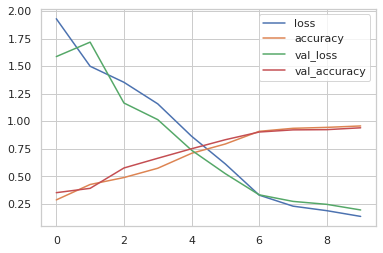

In [173]:
# display loss curve
pd.DataFrame(history.history).plot()

In [174]:
# evaluate model
modelLSTM.evaluate(X_test_2,y_test_2,verbose = True)

451/451 [==============================] - 6s 13ms/step - loss: 0.1629 - accuracy: 0.9518


[0.16291780769824982, 0.9518089294433594]

In [175]:
y_pred=modelLSTM.predict(X_test_2, batch_size=64, verbose=2)
y_test_arg=np.argmax(y_test_2,axis=1)
Y_pred_arg = np.argmax(y_pred, axis = 1)

print('classification_report - LSTM for Unsampled Data')
print('\n')
y_test_inv = encoder.inverse_transform(y_test_arg)
y_pred_inv = encoder.inverse_transform(Y_pred_arg)
print(classification_report(y_test_inv, y_pred_inv))


226/226 - 3s - 3s/epoch - 12ms/step
classification_report - LSTM for Unsampled Data


              precision    recall  f1-score   support

       GRP_0       0.81      0.81      0.81      1029
      GRP_12       0.97      0.97      0.97      1028
      GRP_13       0.99      0.99      0.99      1028
      GRP_14       0.98      0.99      0.99      1029
      GRP_19       0.95      0.98      0.97      1028
       GRP_2       0.97      0.97      0.97      1029
      GRP_24       0.98      1.00      0.99      1029
      GRP_25       0.98      0.99      0.98      1029
      GRP_29       0.96      1.00      0.98      1028
       GRP_3       0.97      0.98      0.97      1029
      GRP_33       0.99      1.00      0.99      1029
       GRP_4       0.99      0.93      0.96      1029
       GRP_8       0.90      0.98      0.94      1029
  GRP_MANUAL       0.87      0.75      0.81      1028

    accuracy                           0.95     14401
   macro avg       0.95      0.95      0.95     

In [176]:
LSTM_R = pd.DataFrame([["LSTM",accuracy_score(y_test_arg ,Y_pred_arg),f1_score(y_test_arg,Y_pred_arg , average='weighted'),precision_score(y_test_arg, Y_pred_arg,average='weighted'),recall_score(y_test_arg, Y_pred_arg,average='weighted')]], columns=log_cols)

### 4.1.2 LSTM with Original Data

In [177]:
#LSTM Model with Original data

feature_tokenizer_2_org = Tokenizer(num_words=max_features, split=' ', oov_token='<unw>', filters=' ')
feature_tokenizer_2_org.fit_on_texts(df_org['en_Description'].astype('str'))
X_2_org = feature_tokenizer_2_org.texts_to_sequences(df_org['en_Description'].astype('str'))
print("Number of Samples in X:", len(X_2_org))       
print(X_2_org[0])

Number of Samples in X: 6804
[34, 6, 173, 5, 1270, 98, 45, 53, 5, 45, 306, 11, 3, 228, 5, 34, 53, 527, 236, 66, 34, 6, 149]


In [178]:
X_2_org = pad_sequences(X_2_org, maxlen = len_words_2, padding='post')

In [179]:
#Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary
num_words_text_2_org = len(feature_tokenizer_2_org.word_index) + 1
print(num_words_text_2_org)
words_to_index_2_org = feature_tokenizer_2_org.word_index

14101


In [180]:
word_index_2_org = feature_tokenizer_2_org.word_index
print('Found %s unique tokens.' % len(word_index_2_org))

Found 14100 unique tokens.


In [181]:
num_words_2_org = min(max_features, len(word_index_2_org)) + 1
print(num_words_2_org)

embedding_dim_2_org = 300

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix_2_org = np.zeros((num_words_2_org, embedding_dim_2_org))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index_2_org.items():
    if i > max_features:
        continue
    embedding_vector_org = embeddings_index.get(word)
    if embedding_vector_org is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix_2_org[i] = embedding_vector_org
    else:
        # doesn't exist, assign a random vector
        embedding_matrix_2_org[i] = np.random.randn(embedding_dim_2_org)

10001


In [182]:
class_2_org = df_org['Assignment group'].nunique()
class_2_org

68

In [183]:
y_2_org= prepare_targets(y_org , class_2_org)
y_2_org.shape

(6804, 68)

In [184]:
X_train_2_org, X_test_2_org, y_train_2_org, y_test_2_org = train_test_split(X_2_org, y_2_org, stratify=y_2_org, test_size=0.33, random_state=42 , shuffle=True)
# summarize
print('Train', X_train_2_org.shape, y_train_2_org.shape)
print('Test', X_test_2_org.shape, y_test_2_org.shape)

Train (4558, 50) (4558, 68)
Test (2246, 50) (2246, 68)


In [185]:
#LSTM Model
modelLSTM_org = Sequential()
modelLSTM_org.add(Embedding(max_features, embedding_dim_2_org, input_length=X_2_org.shape[1]))
modelLSTM_org.add(SpatialDropout1D(0.2))
modelLSTM_org.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
modelLSTM_org.add(Dense(68, activation='softmax'))
modelLSTM_org.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history_org = modelLSTM_org.fit(X_train_2_org, y_train_2_org, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=2)])

Epoch 1/10
65/65 [==============================] - 13s 171ms/step - loss: 2.8739 - accuracy: 0.4459 - val_loss: 2.4844 - val_accuracy: 0.5110
Epoch 2/10
65/65 [==============================] - 11s 165ms/step - loss: 2.5903 - accuracy: 0.4673 - val_loss: 2.4265 - val_accuracy: 0.5351
Epoch 3/10
65/65 [==============================] - 11s 165ms/step - loss: 2.5468 - accuracy: 0.4739 - val_loss: 2.4302 - val_accuracy: 0.5351
Epoch 4/10
65/65 [==============================] - 11s 164ms/step - loss: 2.4666 - accuracy: 0.4773 - val_loss: 2.2646 - val_accuracy: 0.5395
Epoch 5/10
65/65 [==============================] - 11s 164ms/step - loss: 2.2487 - accuracy: 0.4927 - val_loss: 2.1859 - val_accuracy: 0.5351
Epoch 6/10
65/65 [==============================] - 11s 169ms/step - loss: 2.1007 - accuracy: 0.5127 - val_loss: 2.1325 - val_accuracy: 0.5219
Epoch 7/10
65/65 [==============================] - 11s 165ms/step - loss: 1.9420 - accuracy: 0.5346 - val_loss: 2.1309 - val_accuracy: 0.5110

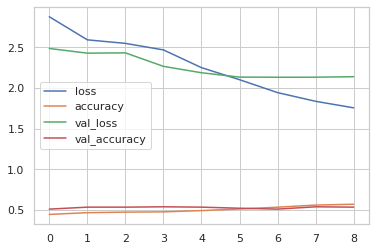

In [186]:
# display loss curve
pd.DataFrame(history_org.history).plot()

In [187]:
# evaluate model
modelLSTM_org.evaluate(X_test_2_org,y_test_2_org,verbose = True)

71/71 [==============================] - 1s 13ms/step - loss: 2.3041 - accuracy: 0.4911


[2.304145574569702, 0.49109527468681335]

In [188]:
y_pred_org=modelLSTM_org.predict(X_test_2_org, batch_size=64, verbose=2)


36/36 - 1s - 620ms/epoch - 17ms/step


In [189]:
y_test_org_arg=np.argmax(y_test_2_org,axis=1)
Y_pred_org_arg = np.argmax(y_pred_org, axis = 1)

print('classification_report - LSTM for Original Data')
print('\n')
y_test_org_inv = encoder_org.inverse_transform(y_test_org_arg)
y_pred_org_inv = encoder_org.inverse_transform(Y_pred_org_arg)
print(classification_report(y_test_org_inv, y_pred_org_inv))


classification_report - LSTM for Original Data


              precision    recall  f1-score   support

       GRP_0       0.71      0.86      0.78      1029
       GRP_1       0.00      0.00      0.00         9
      GRP_10       0.00      0.00      0.00        27
      GRP_11       0.00      0.00      0.00        10
      GRP_12       0.11      0.21      0.14        81
      GRP_13       0.17      0.53      0.25        47
      GRP_14       0.00      0.00      0.00        39
      GRP_15       0.00      0.00      0.00        13
      GRP_16       0.00      0.00      0.00        28
      GRP_17       0.00      0.00      0.00        22
      GRP_18       0.20      0.18      0.19        28
      GRP_19       0.20      0.01      0.03        71
       GRP_2       0.46      0.35      0.40        80
      GRP_20       0.00      0.00      0.00        12
      GRP_21       0.00      0.00      0.00         9
      GRP_22       0.00      0.00      0.00        10
      GRP_23       0.00      0.0

In [190]:
LSTM_R_org = pd.DataFrame([["LSTM",accuracy_score(y_test_org_arg ,Y_pred_org_arg),f1_score(y_test_org_arg,Y_pred_org_arg , average='weighted'),precision_score(y_test_org_arg, Y_pred_org_arg,average='weighted'),recall_score(y_test_org_arg, Y_pred_org_arg,average='weighted')]], columns=log_cols)

## 4.2 Bi-directional LSTM

### 4.2.1 Bi-directional LSTM with Upsampled Data

In [191]:
#Bidiectional LSTM
model_2 = Sequential()
model_2.add(Embedding(num_words_2, 300, weights=[embedding_matrix_2], input_length=len_words_2,  trainable=False))
model_2.add(Bidirectional(LSTM(units=20)))
model_2.add(Dense(40, activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(20))
model_2.add(Dense(14, activation='softmax'))
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 300)           3000300   
                                                                 
 bidirectional (Bidirectiona  (None, 40)               51360     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 40)                1640      
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                820       
                                                                 
 dense_4 (Dense)             (None, 14)                294       
                                                      

In [192]:

#opt = Adam(learning_rate=0.001)
model_2.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['acc'])
my_callbacks_2 = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model_2.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [193]:
X_test_2.shape

(14401, 50)

In [194]:
history_2 = model_2.fit(X_train_2, y_train_2,  epochs=20, batch_size=32,  callbacks=my_callbacks_2,  validation_data=(X_test_2, y_test_2))

Epoch 1/20
914/914 [==============================] - 14s 9ms/step - loss: 1.3862 - acc: 0.5544 - val_loss: 0.5860 - val_acc: 0.8174
Epoch 2/20
914/914 [==============================] - 7s 8ms/step - loss: 0.5759 - acc: 0.8141 - val_loss: 0.3473 - val_acc: 0.8900
Epoch 3/20
914/914 [==============================] - 7s 8ms/step - loss: 0.3871 - acc: 0.8716 - val_loss: 0.2494 - val_acc: 0.9138
Epoch 4/20
914/914 [==============================] - 7s 8ms/step - loss: 0.3041 - acc: 0.8984 - val_loss: 0.1993 - val_acc: 0.9309
Epoch 5/20
914/914 [==============================] - 7s 8ms/step - loss: 0.2515 - acc: 0.9135 - val_loss: 0.1915 - val_acc: 0.9341
Epoch 6/20
914/914 [==============================] - 7s 8ms/step - loss: 0.2180 - acc: 0.9244 - val_loss: 0.1641 - val_acc: 0.9419
Epoch 7/20
914/914 [==============================] - 7s 8ms/step - loss: 0.2003 - acc: 0.9322 - val_loss: 0.1434 - val_acc: 0.9499
Epoch 8/20
914/914 [==============================] - 7s 8ms/step - loss: 0

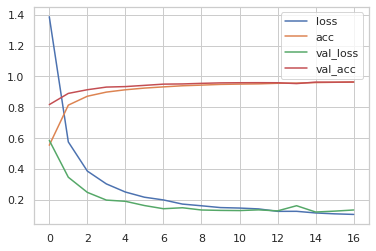

In [195]:
# display loss curve
pd.DataFrame(history_2.history).plot()

In [196]:
# evaluate model
model_2.evaluate(X_test_2,y_test_2,verbose = True)

451/451 [==============================] - 2s 4ms/step - loss: 0.1353 - acc: 0.9637


[0.1352798491716385, 0.9636830687522888]

In [197]:
y_pred_2=model_2.predict(X_test_2, batch_size=32, verbose=2)
y_test_arg=np.argmax(y_test_2,axis=1)
Y_pred_arg = np.argmax(y_pred_2, axis = 1)

print('classification_report - Bidirectional LSTM for UpSampled Data')
print('\n')
y_test_inv = encoder.inverse_transform(y_test_arg)
y_pred_inv = encoder.inverse_transform(Y_pred_arg)
print(classification_report(y_test_inv, y_pred_inv))


451/451 - 2s - 2s/epoch - 4ms/step
classification_report - Bidirectional LSTM for UpSampled Data


              precision    recall  f1-score   support

       GRP_0       0.87      0.85      0.86      1029
      GRP_12       0.99      0.98      0.99      1028
      GRP_13       0.99      0.99      0.99      1028
      GRP_14       0.98      0.99      0.99      1029
      GRP_19       0.98      1.00      0.99      1028
       GRP_2       0.99      0.99      0.99      1029
      GRP_24       0.99      1.00      1.00      1029
      GRP_25       0.99      1.00      0.99      1029
      GRP_29       0.99      0.98      0.99      1028
       GRP_3       0.97      1.00      0.98      1029
      GRP_33       0.99      1.00      1.00      1029
       GRP_4       0.98      0.94      0.96      1029
       GRP_8       0.89      0.98      0.93      1029
  GRP_MANUAL       0.90      0.79      0.84      1028

    accuracy                           0.96     14401
   macro avg       0.96      0.96  

### 4.2.2 Bidirectional LSTM  Original Data

In [198]:
B_LSTM = pd.DataFrame([["B_LSTM",accuracy_score(y_test_arg , Y_pred_arg),f1_score(y_test_arg , Y_pred_arg,average='weighted'),precision_score(y_test_arg ,  Y_pred_arg ,average='weighted'),recall_score(y_test_arg ,  Y_pred_arg,average='weighted')]], columns=log_cols)

In [199]:
#Bidiectional LSTM on Original Data
model_2_org = Sequential()
model_2_org.add(Embedding(num_words_2_org, 300, weights=[embedding_matrix_2_org], input_length=len_words_2,  trainable=False))
model_2_org.add(Bidirectional(LSTM(units=20)))
model_2_org.add(Dense(40, activation='relu'))
model_2_org.add(Dropout(0.4))
model_2_org.add(Dense(20))
model_2_org.add(Dense(68, activation='softmax'))
model_2_org.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 300)           3000300   
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               51360     
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 40)                1640      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                820       
                                                                 
 dense_7 (Dense)             (None, 68)                1428      
                                                      

In [200]:

#opt = Adam(learning_rate=0.001)
model_2_org.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['acc'])
my_callbacks_2_org = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model_2_org.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [201]:
history_2_org = model_2_org.fit(X_train_2_org, y_train_2_org,  epochs=20, batch_size=32,  callbacks=my_callbacks_2_org,  validation_data=(X_test_2_org, y_test_2_org))

Epoch 1/20
143/143 [==============================] - 5s 14ms/step - loss: 2.9393 - acc: 0.4373 - val_loss: 2.4142 - val_acc: 0.4849
Epoch 2/20
143/143 [==============================] - 1s 8ms/step - loss: 2.3356 - acc: 0.4908 - val_loss: 2.2402 - val_acc: 0.5045
Epoch 3/20
143/143 [==============================] - 1s 8ms/step - loss: 2.1341 - acc: 0.5195 - val_loss: 2.1120 - val_acc: 0.5325
Epoch 4/20
143/143 [==============================] - 1s 8ms/step - loss: 1.9420 - acc: 0.5441 - val_loss: 2.0085 - val_acc: 0.5512
Epoch 5/20
143/143 [==============================] - 1s 8ms/step - loss: 1.8031 - acc: 0.5667 - val_loss: 1.9624 - val_acc: 0.5539
Epoch 6/20
143/143 [==============================] - 1s 9ms/step - loss: 1.6699 - acc: 0.5906 - val_loss: 1.9730 - val_acc: 0.5592
Epoch 7/20
143/143 [==============================] - 1s 8ms/step - loss: 1.5734 - acc: 0.6016 - val_loss: 1.9312 - val_acc: 0.5521
Epoch 8/20
143/143 [==============================] - 1s 8ms/step - loss: 1

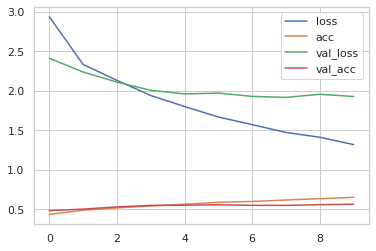

In [202]:
# display loss curve
pd.DataFrame(history_2_org.history).plot()

In [203]:
# evaluate model
model_2_org.evaluate(X_test_2_org,y_test_2_org,verbose = True)

71/71 [==============================] - 0s 4ms/step - loss: 1.9294 - acc: 0.5663


[1.9294275045394897, 0.5663401484489441]

In [204]:
y_pred_2_org=model_2_org.predict(X_test_2_org, batch_size=32, verbose=2)


71/71 - 1s - 814ms/epoch - 11ms/step


In [205]:
y_test_org_arg=np.argmax(y_test_2_org,axis=1)
Y_pred_org_arg = np.argmax(y_pred_2_org, axis = 1)

print('classification report - Bidirectional LSTM for Original Data')
print('\n')
y_test_org_inv = encoder_org.inverse_transform(y_test_org_arg)
y_pred_org_inv = encoder_org.inverse_transform(Y_pred_org_arg)
print(classification_report(y_test_org_inv, y_pred_org_inv))

classification report - Bidirectional LSTM for Original Data


              precision    recall  f1-score   support

       GRP_0       0.68      0.90      0.78      1029
       GRP_1       0.00      0.00      0.00         9
      GRP_10       0.00      0.00      0.00        27
      GRP_11       0.00      0.00      0.00        10
      GRP_12       0.37      0.62      0.46        81
      GRP_13       0.24      0.64      0.34        47
      GRP_14       0.17      0.05      0.08        39
      GRP_15       0.00      0.00      0.00        13
      GRP_16       0.17      0.04      0.06        28
      GRP_17       0.95      0.82      0.88        22
      GRP_18       0.20      0.11      0.14        28
      GRP_19       0.25      0.21      0.23        71
       GRP_2       0.33      0.26      0.29        80
      GRP_20       0.00      0.00      0.00        12
      GRP_21       0.00      0.00      0.00         9
      GRP_22       0.00      0.00      0.00        10
      GRP_23      

In [206]:
B_LSTM_org = pd.DataFrame([["B_LSTM",accuracy_score(y_test_org_arg , Y_pred_org_arg),f1_score(y_test_org_arg , Y_pred_org_arg,average='weighted'),precision_score(y_test_org_arg ,  Y_pred_org_arg ,average='weighted'),recall_score(y_test_org_arg ,  Y_pred_org_arg,average='weighted')]], columns=log_cols)

## 4.3 FastText

**Fasttext**

fastText classifier to classify Tickets

fastText is an open-source library, developed by the Facebook AI Research lab. Its main focus is on achieving scalable solutions for the tasks of text classification and representation while processing large datasets quickly and accurately. 

fastText expects the category first, with the prefix ‘label’ before each category, and then the input text

Install FastText

In [207]:
!wget https://github.com/facebookresearch/fastText/archive/0.2.0.zip
!unzip 0.2.0.zip
%cd fastText-0.2.0
!make

--2022-08-23 09:50:34--  https://github.com/facebookresearch/fastText/archive/0.2.0.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/refs/tags/0.2.0 [following]
--2022-08-23 09:50:34--  https://codeload.github.com/facebookresearch/fastText/zip/refs/tags/0.2.0
Resolving codeload.github.com (codeload.github.com)... 20.27.177.114
Connecting to codeload.github.com (codeload.github.com)|20.27.177.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘0.2.0.zip’

0.2.0.zip               [  <=>               ]   4.10M  11.3MB/s    in 0.4s    

2022-08-23 09:50:35 (11.3 MB/s) - ‘0.2.0.zip’ saved [4304799]

Archive:  0.2.0.zip
7842495a4d64c7a3bb4339d45d6e64321d002ed8
   creating: fastText-0.2.0/
   creating: fastText-0.2.0/.circleci/
  inf

In [208]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.2 MB/s 
  Using cached pybind11-2.10.0-py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3165188 sha256=864084ce413465c7b9c3fecc143f17fd8d8fc354105604aa8e63d874638d7f1e
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


### 4.3.1 FastText upsampled data

In [209]:
import fasttext

In [210]:
# NLP Preprocessing
from gensim.utils import simple_preprocess

In [211]:
fasttextdata = itTicketDF_resampled.copy()

In [212]:
fasttextdata.head()

Assignment group                                     en_Description  \
3404            GRP_0  outlook error receive doxmlcprxjheyscugmailcom...   
2821            GRP_0  company centerpassword change set user company...   
4676            GRP_0  outlook issue receive iqmhjlwrjqmxaybigmailcom...   
8425            GRP_0  can not reset erp password long know erp passw...   
5790            GRP_0                             delete print job prtqc   

      length  len_words  
3404     136         20  
2821     149         25  
4676     164         21  
8425      79         13  
5790      22          4

In [213]:
fasttextdata.drop(['length' , 'len_words'] , axis=1 , inplace=True)

In [214]:
# NLP Preprocess
#to discard any tokens shorter than min_len=2 characters.
fasttextdata['en_Description'] = fasttextdata['en_Description'].apply(lambda x: ' '.join(simple_preprocess(x)))

In [215]:
# Prefixing each row of the category column with '__label__'
fasttextdata['Assignment group'] = fasttextdata['Assignment group'].apply(lambda x: '__label__' + x)

In [216]:
fasttextdata.head()

Assignment group                                     en_Description
3404   __label__GRP_0  outlook error receive able get outlook keep ge...
2821   __label__GRP_0  company centerpassword change set user company...
4676   __label__GRP_0  outlook issue receive guy help advise change p...
8425   __label__GRP_0  can not reset erp password long know erp passw...
5790   __label__GRP_0                             delete print job prtqc

**Training & Evaluation**
After saving our DataFrames as text files, the next step is training and testing our model.

In [217]:
X_train, X_test, y_train, y_test = train_test_split(fasttextdata['en_Description'], fasttextdata['Assignment group'], stratify=fasttextdata['Assignment group'], test_size=0.33, random_state=42 , shuffle=True)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (29237,) (29237,)
Test (14401,) (14401,)


In [218]:
df_train=pd.concat([X_train,y_train],axis=1)
df_test=pd.concat([X_test,y_test],axis=1)

In [219]:
df_train.head()

en_Description Assignment group
523   mobile device activation colleague would activ...   __label__GRP_0
7587  erp purchase error try submit describe need sh...  __label__GRP_29
8380  evening job job scheduler bkhanasid osdlydp re...   __label__GRP_8
1272  problem user temporary merdivan xwirzvda okhyipgr  __label__GRP_24
2159  add new customer engineeringtool application r...  __label__GRP_25

In [220]:
import csv
# Saving the CSV file as a text file to train/test the classifier
df_train[['Assignment group', 'en_Description']].to_csv('/content/drive/MyDrive/Colab Notebooks/train.txt', 
                                          index = False, 
                                          sep = ' ',
                                          header = None, 
                                          quoting = csv.QUOTE_NONE, 
                                          quotechar = "", 
                                          escapechar = " ")

df_test[['Assignment group', 'en_Description']].to_csv('/content/drive/MyDrive/Colab Notebooks/test.txt', 
                                     index = False, 
                                     sep = ' ',
                                     header = None, 
                                     quoting = csv.QUOTE_NONE, 
                                     quotechar = "", 
                                     escapechar = " ")

In [221]:
# Training the fastText classifier
model = fasttext.train_supervised('/content/drive/MyDrive/Colab Notebooks/train.txt', wordNgrams = 2 ,  lr=1.0, epoch=25)

In [222]:
# Evaluating performance on the entire test file
model.test('/content/drive/MyDrive/Colab Notebooks/test.txt')  

(14401, 0.9802097076591904, 0.9802097076591904)

In [223]:
#Save Model
model.save_model("/content/drive/MyDrive/Colab Notebooks/model_filename.bin")

In [224]:
#Retrive Model
fasttextmodel = fasttext.load_model("/content/drive/MyDrive/Colab Notebooks/model_filename.bin")

In [225]:
df_test.iloc[5]

en_Description      unable create delivery please provide follow o...
Assignment group                                      __label__GRP_29
Name: 4994, dtype: object

In [226]:
# Predicting on a single input
output = fasttextmodel.predict(df_test.iloc[5, 0])
p_label = output[0][0]
p_accuracy = output[1][0]
p_label


'__label__GRP_29'

In [227]:
def predict_fasttext(senctence):
  output = fasttextmodel.predict(senctence)
  p_label = output[0][0]
  p_accuracy = output[1][0]
  return pd.Series([p_label , p_accuracy])

In [228]:
fasttextdf_test = df_test.copy()

In [229]:
fasttextdf_test[['p_label' , 'p_accuracy']] = fasttextdf_test['en_Description'].apply(predict_fasttext )


In [230]:
fasttextdf_test.head()

en_Description     Assignment group  \
2892  termination action manuel zuehlke complete kün...       __label__GRP_2   
7681  material posting production order balance requ...  __label__GRP_MANUAL   
5604  shop floor server issue receive request assist...      __label__GRP_14   
1942  hostname application plm dsc file node hostnam...      __label__GRP_14   
324                                 get onto network pc       __label__GRP_3   

                  p_label  p_accuracy  
2892       __label__GRP_2    1.000010  
7681  __label__GRP_MANUAL    0.467694  
5604      __label__GRP_14    0.998791  
1942      __label__GRP_14    0.999856  
324        __label__GRP_3    0.999986

In [231]:
 class_names = fasttextdf_test['Assignment group'].unique()
 class_names

array(['__label__GRP_2', '__label__GRP_MANUAL', '__label__GRP_14',
       '__label__GRP_3', '__label__GRP_29', '__label__GRP_25',
       '__label__GRP_19', '__label__GRP_12', '__label__GRP_0',
       '__label__GRP_8', '__label__GRP_33', '__label__GRP_13',
       '__label__GRP_24', '__label__GRP_4'], dtype=object)

In [232]:
print('classification report - Fasttext for UpSampled Data')
print('\n')
print(classification_report(fasttextdf_test['Assignment group'], fasttextdf_test['p_label'], target_names=class_names))

print(confusion_matrix(fasttextdf_test['Assignment group'], fasttextdf_test['p_label']))

classification report - Fasttext for UpSampled Data


                     precision    recall  f1-score   support

     __label__GRP_2       0.94      0.92      0.93      1028
__label__GRP_MANUAL       0.98      0.99      0.99      1029
    __label__GRP_14       0.99      0.99      0.99      1029
     __label__GRP_3       0.99      0.99      0.99      1029
    __label__GRP_29       0.99      1.00      0.99      1029
    __label__GRP_25       0.98      1.00      0.99      1028
    __label__GRP_19       1.00      1.00      1.00      1029
    __label__GRP_12       0.99      1.00      1.00      1029
     __label__GRP_0       0.95      1.00      0.97      1029
     __label__GRP_8       0.99      0.99      0.99      1028
    __label__GRP_33       1.00      1.00      1.00      1029
    __label__GRP_13       1.00      1.00      1.00      1028
    __label__GRP_24       0.97      0.98      0.98      1028
     __label__GRP_4       0.95      0.86      0.90      1029

           accuracy          

In [233]:
y_test_f = fasttextdf_test['Assignment group']
y_pred_f = fasttextdf_test['p_label']

In [234]:
Fasttext = pd.DataFrame([["Fasttext",accuracy_score(y_test , y_pred_f ),f1_score(y_test_f , y_pred_f,average='weighted'),precision_score(y_test_f, y_pred_f,average='weighted'),recall_score(y_test_f, y_pred_f,average='weighted')]], columns=log_cols)

In [235]:
fasttextdata_org = df_org.copy()

### 4.3.2 Fast Text Original Data

In [236]:
# NLP Preprocess
#to discard any tokens shorter than min_len=2 characters.
fasttextdata_org['en_Description'] = fasttextdata_org['en_Description'].apply(lambda x: ' '.join(simple_preprocess(x)))

In [237]:
# Prefixing each row of the category column with '__label__'
fasttextdata_org['Assignment group'] = fasttextdata_org['Assignment group'].apply(lambda x: '__label__' + x)

In [238]:
fasttextdata_org.head()

Assignment group                                     en_Description  length  \
0   __label__GRP_0  login issue verify user detailsemployee manage...     150   
1   __label__GRP_0  outlook receive team meetingsskype meeting etc...     124   
2   __label__GRP_0                    can not log vpn receive log vpn      56   
3   __label__GRP_0                          unable access hrtool page      25   
4   __label__GRP_0                                        skype error      11   

   len_words  
0         23  
1         14  
2          8  
3          4  
4          2

In [239]:
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(fasttextdata_org['en_Description'], fasttextdata_org['Assignment group'], stratify=fasttextdata_org['Assignment group'], test_size=0.33, random_state=42 , shuffle=True)
# summarize
print('Train', X_train_org.shape, y_train_org.shape)
print('Test', X_test_org.shape, y_test_org.shape)

Train (4558,) (4558,)
Test (2246,) (2246,)


In [240]:
df_train_org=pd.concat([X_train_org,y_train_org],axis=1)
df_test_org=pd.concat([X_test_org,y_test_org],axis=1)

In [241]:
df_train_org.head()

en_Description Assignment group
2219  outlook user get crm outlook configure yesterd...   __label__GRP_0
8468  unblock account use outlook app nwfodmhc exurc...   __label__GRP_0
1173  network outage pdmvpn rtr since et type outage...   __label__GRP_8
4735  hand scanner feedback terminal defective hand ...  __label__GRP_33
7406  company guest account creation request summary...   __label__GRP_0

In [242]:
# Saving the CSV file as a text file to train/test the classifier
df_train_org[['Assignment group', 'en_Description']].to_csv('/content/drive/MyDrive/Colab Notebooks/train_org.txt', 
                                          index = False, 
                                          sep = ' ',
                                          header = None, 
                                          quoting = csv.QUOTE_NONE, 
                                          quotechar = "", 
                                          escapechar = " ")

df_test_org[['Assignment group', 'en_Description']].to_csv('/content/drive/MyDrive/Colab Notebooks/test_org.txt', 
                                     index = False, 
                                     sep = ' ',
                                     header = None, 
                                     quoting = csv.QUOTE_NONE, 
                                     quotechar = "", 
                                     escapechar = " ")

In [243]:
# Training the fastText classifier
model_org = fasttext.train_supervised('/content/drive/MyDrive/Colab Notebooks/train_org.txt', wordNgrams = 2 ,  lr=1.0, epoch=25)

In [244]:
# Evaluating performance on the entire test file
model_org.test('/content/drive/MyDrive/Colab Notebooks/test_org.txt')  

(2246, 0.6362422083704363, 0.6362422083704363)

In [245]:
#Save Model
model_org.save_model("/content/drive/MyDrive/Colab Notebooks/model_filename_org.bin")

In [246]:
#Retrive Model
fasttextmodel_org = fasttext.load_model("/content/drive/MyDrive/Colab Notebooks/model_filename_org.bin")

In [247]:
def predict_fasttext_org(senctence):
  output = fasttextmodel_org.predict(senctence)
  p_label = output[0][0]
  p_accuracy = output[1][0]
  return pd.Series([p_label , p_accuracy])

In [248]:
fasttextdf_test_org = df_test_org.copy()

In [249]:
fasttextdf_test_org[['p_label' , 'p_accuracy']] = fasttextdf_test_org['en_Description'].apply(predict_fasttext_org )

In [250]:
 class_names_org = fasttextdf_test_org['Assignment group'].unique()
 class_names_org

array(['__label__GRP_12', '__label__GRP_0', '__label__GRP_10',
       '__label__GRP_2', '__label__GRP_3', '__label__GRP_8',
       '__label__GRP_4', '__label__GRP_30', '__label__GRP_24',
       '__label__GRP_16', '__label__GRP_13', '__label__GRP_6',
       '__label__GRP_29', '__label__GRP_42', '__label__GRP_18',
       '__label__GRP_22', '__label__GRP_19', '__label__GRP_5',
       '__label__GRP_37', '__label__GRP_25', '__label__GRP_45',
       '__label__GRP_9', '__label__GRP_33', '__label__GRP_23',
       '__label__GRP_17', '__label__GRP_26', '__label__GRP_7',
       '__label__GRP_11', '__label__GRP_65', '__label__GRP_21',
       '__label__GRP_14', '__label__GRP_43', '__label__GRP_40',
       '__label__GRP_62', '__label__GRP_28', '__label__GRP_59',
       '__label__GRP_27', '__label__GRP_20', '__label__GRP_41',
       '__label__GRP_48', '__label__GRP_58', '__label__GRP_66',
       '__label__GRP_15', '__label__GRP_49', '__label__GRP_44',
       '__label__GRP_34', '__label__GRP_39', '__l

In [251]:
print('classification report - Fasttext for Original Data')
print('\n')
print(classification_report(fasttextdf_test_org['Assignment group'], fasttextdf_test_org['p_label'], target_names=class_names_org))

print(confusion_matrix(fasttextdf_test_org['Assignment group'], fasttextdf_test_org['p_label']))

classification report - Fasttext for Original Data


                 precision    recall  f1-score   support

__label__GRP_12       0.73      0.90      0.80      1029
 __label__GRP_0       0.20      0.11      0.14         9
__label__GRP_10       0.50      0.37      0.43        27
 __label__GRP_2       0.22      0.20      0.21        10
 __label__GRP_3       0.52      0.59      0.55        81
 __label__GRP_8       0.50      0.60      0.54        47
 __label__GRP_4       0.41      0.33      0.37        39
__label__GRP_30       0.50      0.46      0.48        13
__label__GRP_24       0.08      0.04      0.05        28
__label__GRP_16       0.92      1.00      0.96        22
__label__GRP_13       0.47      0.32      0.38        28
 __label__GRP_6       0.56      0.32      0.41        71
__label__GRP_29       0.53      0.49      0.51        80
__label__GRP_42       0.12      0.08      0.10        12
__label__GRP_18       0.00      0.00      0.00         9
__label__GRP_22       1.00      0.

In [252]:
y_test_f_org = fasttextdf_test_org['Assignment group']
y_pred_f_org = fasttextdf_test_org['p_label']

In [253]:
Fasttext_org = pd.DataFrame([["Fasttext",accuracy_score( y_test_f_org,y_pred_f_org),f1_score(y_test_f_org ,y_pred_f_org, average='weighted'),precision_score(y_test_f_org, y_pred_f_org,average='weighted'),recall_score(y_test_f_org, y_pred_f_org,average='weighted')]], columns=log_cols)

## 4.4 BERT

### 4.4.1 BERT  Upsampled Data

In [254]:
!pip install transformers
import transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 4.2 MB/s 
     |████████████████████████████████| 6.6 MB 63.3 MB/s 
     |████████████████████████████████| 101 kB 13.9 MB/s 


In [255]:
from transformers import AutoTokenizer,TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [256]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(itTicketDF_resampled['en_Description'] , y_2 , stratify=y_2 , test_size=0.33, random_state=42 , shuffle=True)
# summarize
print('Train', X_train_b.shape, y_train_b.shape)
print('Test', X_test_b.shape, y_test_b.shape)

Train (29237,) (29237, 14)
Test (14401,) (14401, 14)


In [257]:
# here tokenizer using from bert-base-cased
x_train = tokenizer(
    text=X_train_b.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [258]:
x_test = tokenizer(
    text=X_test_b.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [259]:
input_ids = x_train['input_ids']
attention_mask = x_train['attention_mask']

In [260]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy

In [261]:
max_len = 70
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
embeddings = bert(input_ids,attention_mask = input_mask)[0] 
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)
y = Dense(14,activation = 'softmax')(out)
model_bert = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model_bert.layers[2].trainable = True

In [262]:
optimizer = Adam(
    learning_rate=5e-05, # this learning rate is for bert model , taken from huggingface website 
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)
# Set loss and metrics
loss = 'categorical_crossentropy' ,
metric = CategoricalAccuracy('balanced_accuracy'),
# Compile the model
model_bert.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)

In [263]:
train_history = model_bert.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = y_train_2,
    validation_data = (
    {'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']}, y_test_2
    ),
  epochs=2,
    batch_size=64
)

Epoch 1/2


457/457 [==============================] - 296s 603ms/step - loss: 1.0839 - balanced_accuracy: 0.6710 - val_loss: 0.3552 - val_balanced_accuracy: 0.8988
Epoch 2/2
457/457 [==============================] - 273s 597ms/step - loss: 0.3161 - balanced_accuracy: 0.9092 - val_loss: 0.1942 - val_balanced_accuracy: 0.9403


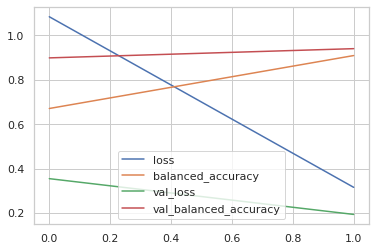

In [264]:
# display loss curve
pd.DataFrame(train_history.history).plot()

In [265]:
predicted_raw = model_bert.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})
predicted_raw[0]

array([4.9194845e-04, 7.4363749e-07, 1.9435582e-03, 3.0733641e-05,
       1.1074458e-03, 9.9675954e-06, 1.0631981e-03, 8.4066069e-06,
       9.6146345e-01, 3.7497378e-04, 2.0924554e-05, 5.0103660e-07,
       3.2882483e-05, 3.3451151e-02], dtype=float32)

In [266]:
y_test_arg=np.argmax(y_test_2,axis=1)
Y_pred = np.argmax(predicted_raw, axis = 1)
print('BERT for UpSampled Data')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

BERT for UpSampled Data


Confusion Matrix
[[ 736   20    4   19   47   33    9   16    3   21    1    7    1  112]
 [   0 1019    0    0    0    0    0    0    0    0    0    6    3    0]
 [   0    0 1020    0    0    0    0    0    0    0    0    0    8    0]
 [   0    0    0 1022    0    0    0    0    0    0    0    0    7    0]
 [   0    0    0    0 1028    0    0    0    0    0    0    0    0    0]
 [   3    2    0    0    0 1019    0    0    0    5    0    0    0    0]
 [   6    5    0    0    0    0 1017    1    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1029    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  997    0    0    0   31    0]
 [  13    0    0    0   12    0    0    3    0 1001    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 1029    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1029    0    0]
 [   0   20    0   10    0    0    0    0    0    3    0   12  984    0]
 [ 136  

In [267]:
print('BERT for UpSampled Data')
print('\n')

print('classification_report - BERT for UpSampled Data')
print('\n')
y_test_inv = encoder.inverse_transform(y_test_arg)
y_pred_inv = encoder.inverse_transform(Y_pred)
print(classification_report(y_test_inv, y_pred_inv))

BERT for UpSampled Data


classification_report - BERT for UpSampled Data


              precision    recall  f1-score   support

       GRP_0       0.82      0.72      0.77      1029
      GRP_12       0.92      0.99      0.95      1028
      GRP_13       0.96      0.99      0.98      1028
      GRP_14       0.92      0.99      0.96      1029
      GRP_19       0.94      1.00      0.97      1028
       GRP_2       0.95      0.99      0.97      1029
      GRP_24       0.98      0.99      0.99      1029
      GRP_25       0.98      1.00      0.99      1029
      GRP_29       0.98      0.97      0.98      1028
       GRP_3       0.96      0.97      0.96      1029
      GRP_33       0.99      1.00      0.99      1029
       GRP_4       0.97      1.00      0.99      1029
       GRP_8       0.90      0.96      0.93      1029
  GRP_MANUAL       0.85      0.59      0.70      1028

    accuracy                           0.94     14401
   macro avg       0.94      0.94      0.94     14401
weig

In [268]:
bert_model = pd.DataFrame([["BERT",accuracy_score(y_test_arg , Y_pred),f1_score(y_test_arg , Y_pred,average='weighted'),precision_score(y_test_arg, Y_pred,average='weighted'),recall_score(y_test_arg, Y_pred,average='weighted')]], columns=log_cols)

In [269]:
X_train_b_org, X_test_b_org, y_train_b_org, y_test_b_org = train_test_split(df_org['en_Description'] , y_2_org , stratify=y_2_org , test_size=0.33, random_state=42 , shuffle=True)
# summarize
print('Train', X_train_b_org.shape, y_train_b_org.shape)
print('Test', X_test_b_org.shape, y_test_b_org.shape)

Train (4558,) (4558, 68)
Test (2246,) (2246, 68)


In [270]:
# here tokenizer using from bert-base-cased
x_train_org = tokenizer(
    text=X_train_b_org.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [271]:
x_test_org = tokenizer(
    text=X_test_b_org.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [272]:
input_ids = x_train_org['input_ids']
attention_mask = x_train_org['attention_mask']

In [273]:
max_len = 70
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
embeddings = bert(input_ids,attention_mask = input_mask)[0] 
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)
y = Dense(68,activation = 'softmax')(out)
model_bert = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model_bert.layers[2].trainable = True

In [274]:
optimizer_org = Adam(
    learning_rate=5e-05, # this learning rate is for bert model , taken from huggingface website 
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)
# Set loss and metrics
loss = 'categorical_crossentropy' ,
metric = CategoricalAccuracy('balanced_accuracy'),
# Compile the model
model_bert.compile(
    optimizer = optimizer_org,
    loss = loss, 
    metrics = metric)

In [275]:
train_history = model_bert.fit(
    x ={'input_ids':x_train_org['input_ids'],'attention_mask':x_train_org['attention_mask']} ,
    y = y_train_2_org,
    validation_data = (
    {'input_ids':x_test_org['input_ids'],'attention_mask':x_test_org['attention_mask']}, y_test_2_org
    ),
  epochs=20,
    batch_size=64
)

Epoch 1/20


72/72 [==============================] - 65s 632ms/step - loss: 3.0031 - balanced_accuracy: 0.4623 - val_loss: 2.4078 - val_balanced_accuracy: 0.5690
Epoch 2/20
72/72 [==============================] - 43s 592ms/step - loss: 2.2515 - balanced_accuracy: 0.5803 - val_loss: 2.1188 - val_balanced_accuracy: 0.6189
Epoch 3/20
72/72 [==============================] - 43s 593ms/step - loss: 1.8134 - balanced_accuracy: 0.6593 - val_loss: 1.8916 - val_balanced_accuracy: 0.6634
Epoch 4/20
72/72 [==============================] - 43s 593ms/step - loss: 1.4677 - balanced_accuracy: 0.7211 - val_loss: 1.8054 - val_balanced_accuracy: 0.6825
Epoch 5/20
72/72 [==============================] - 43s 593ms/step - loss: 1.2577 - balanced_accuracy: 0.7547 - val_loss: 1.7224 - val_balanced_accuracy: 0.6888
Epoch 6/20
72/72 [==============================] - 43s 592ms/step - loss: 1.0857 - balanced_accuracy: 0.7850 - val_loss: 1.7324 - val_balanced_accuracy: 0.6879
Epoch 7/20
72/72 [===========================

In [276]:
predicted_raw = model_bert.predict({'input_ids':x_test_org['input_ids'],'attention_mask':x_test_org['attention_mask']})
predicted_raw[0]

array([5.78352308e-04, 1.14499941e-03, 1.43909037e-05, 5.18754881e-04,
       4.03737277e-03, 1.40632721e-04, 5.84434951e-03, 1.31361745e-02,
       3.70152551e-03, 8.52671623e-01, 1.01957633e-03, 3.62128339e-04,
       2.52258687e-05, 1.70689120e-04, 4.27208404e-04, 3.14594060e-02,
       7.39686831e-04, 9.51907691e-03, 7.68738610e-05, 8.37590918e-03,
       3.20582796e-04, 5.79478277e-04, 1.00580940e-03, 4.71816611e-06,
       2.99673447e-05, 1.19768828e-03, 6.87020838e-06, 3.92008631e-04,
       1.26136085e-02, 8.46938172e-04, 1.85378492e-04, 1.11935427e-04,
       1.00990839e-03, 8.59179592e-04, 2.05507642e-03, 2.08506472e-02,
       1.32624089e-04, 8.73625278e-04, 2.87408591e-03, 7.83052936e-04,
       5.40012807e-05, 3.08757240e-04, 6.15570287e-04, 1.23250493e-05,
       1.90995459e-04, 2.30258738e-05, 3.16762853e-05, 1.07871334e-03,
       3.95773910e-03, 9.85150575e-04, 4.36151413e-06, 3.38567392e-04,
       7.56183681e-06, 5.76531675e-05, 3.31882329e-04, 4.62541735e-04,
      

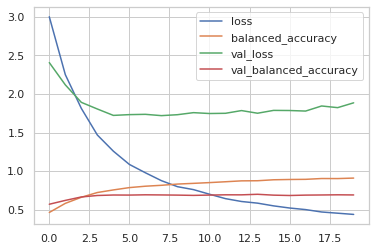

In [277]:
# display loss curve
pd.DataFrame(train_history.history).plot()

In [278]:
y_test_arg=np.argmax(y_test_2_org,axis=1)
Y_pred = np.argmax(predicted_raw, axis = 1)
print('BERT for Original Data')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

BERT for Original Data


Confusion Matrix
[[892   0   0 ...   0   1   2]
 [  2   2   0 ...   0   1   0]
 [  2   0   5 ...   0   1   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  1   1   0 ...   0  84   0]
 [  7   0   0 ...   0   5   4]]


### 4.4.2 BERT for Original Data

In [279]:
print('BERT for Original Data')
print('\n')

print('classification_report - BERT for Original Data')
print('\n')
y_test_inv = encoder_org.inverse_transform(y_test_arg)
y_pred_inv = encoder_org.inverse_transform(Y_pred)
print(classification_report(y_test_inv, y_pred_inv))

BERT for Original Data


classification_report - BERT for Original Data


              precision    recall  f1-score   support

       GRP_0       0.82      0.87      0.84      1029
       GRP_1       0.40      0.22      0.29         9
      GRP_10       0.36      0.19      0.24        27
      GRP_11       1.00      0.10      0.18        10
      GRP_12       0.66      0.80      0.72        81
      GRP_13       0.61      0.91      0.73        47
      GRP_14       0.50      0.67      0.57        39
      GRP_15       0.00      0.00      0.00        13
      GRP_16       0.36      0.57      0.44        28
      GRP_17       0.88      1.00      0.94        22
      GRP_18       0.28      0.39      0.33        28
      GRP_19       0.76      0.49      0.60        71
       GRP_2       0.74      0.64      0.68        80
      GRP_20       0.04      0.08      0.05        12
      GRP_21       0.25      0.22      0.24         9
      GRP_22       0.17      0.70      0.28        10
      G

In [280]:
bert_org = pd.DataFrame([["BERT",accuracy_score(y_test_arg , Y_pred),f1_score(y_test_arg , Y_pred,average='weighted'),precision_score(y_test_arg, Y_pred,average='weighted'),recall_score(y_test_arg, Y_pred,average='weighted')]], columns=log_cols)

In [291]:
texts = "Password reset"
x_val = tokenizer(
    text=texts,
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding='max_length', 
    return_tensors='tf',

    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True) 

In [292]:
validation = model_bert.predict({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']})*100

In [293]:
# prepare target

def prepare_targets_labelEncoder(y_in ):
	le = LabelEncoder()
	le.fit(y_in)
	y_enc = le.transform(y_in)
	
	return y_enc
  
y_enc = prepare_targets_labelEncoder(itTicketDF_resampled['Assignment group'])

In [294]:
encoded_dict = {}
def get_ket_dict(y_enc , df ):
  col = 'Assignment group'
  i = 0
  for index, row in df.iterrows():
    encoded_dict[row['Assignment group']] = y_enc[i]
    i = i +1

In [295]:
get_ket_dict(y_enc , itTicketDF_resampled)

# 5. Model Comparison

## 5.1 Model Comparison  Upsampled Data

In [290]:
#Model Comaprision with Upsampled dataset
log=pd.concat([MultinomialNB, SVM_clf, rndClassifier, LogisticR, xgboost_rpt,  LSTM_R ,B_LSTM ,Fasttext , bert_model],axis=0)
log_sort = log.sort_values(['f1_score', 'Accuracy' , 'Precision' , 'Recall'], ascending=[False , False ,False ,False])
print(log_sort)

           Classifier  Accuracy  f1_score  Precision    Recall
0   Random Classifier  0.984762  0.984593   0.984856  0.984762
0            Fasttext  0.980210  0.979901   0.980047  0.980210
0                 SVM  0.977887  0.977647   0.977682  0.977887
0              B_LSTM  0.963683  0.963088   0.963519  0.963683
0                LSTM  0.951809  0.950999   0.951369  0.951809
0  LogisticRegression  0.946609  0.948513   0.945528  0.946609
0                BERT  0.940282  0.936568   0.937294  0.940282
0       MultinomialNB  0.890124  0.883840   0.890495  0.890124
0             Xgboost  0.873396  0.868308   0.867970  0.873396


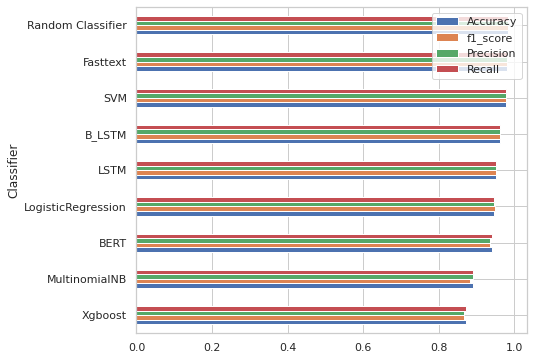

In [284]:
log.set_index(["Classifier"],inplace=True)
log.sort_values(by=['f1_score'])
log.sort_values(by=['f1_score']).plot(kind='barh',figsize=[7,6])

### 5.2 Model comparison  Original Data

In [289]:
log_org=pd.concat([MultinomialNB_org, SVM__org , RClassifier_org,  LogisticRegression_org, xgb_org,  LSTM_R_org ,B_LSTM_org ,Fasttext_org , bert_org],axis=0)
log_org_sort = log_org.sort_values(['f1_score', 'Accuracy' , 'Precision' , 'Recall'], ascending=[False , False ,False ,False])
print(log_org_sort)

           Classifier  Accuracy  f1_score  Precision    Recall
0  LogisticRegression  0.590742  0.686671   0.502463  0.590742
0                BERT  0.689671  0.672688   0.674263  0.689671
0            Fasttext  0.636242  0.604855   0.595704  0.636242
0             Xgboost  0.597355  0.532169   0.576611  0.597355
0   Random Classifier  0.585599  0.502537   0.525300  0.585599
0              B_LSTM  0.566340  0.498613   0.467952  0.566340
0                 SVM  0.585599  0.484623   0.515899  0.585599
0                LSTM  0.491095  0.419068   0.383753  0.491095
0       MultinomialNB  0.510654  0.364004   0.326374  0.510654


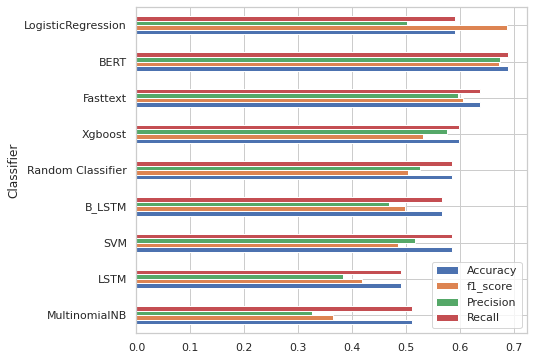

In [286]:
log_org.set_index(["Classifier"],inplace=True)
log_org.sort_values(by=['f1_score'])
log_org.sort_values(by=['f1_score']).plot(kind='barh',figsize=[7,6])

In [296]:
validation

array([[9.83310394e+01, 1.27598864e-03, 1.62559882e-05, 8.50050128e-04,
        5.36880977e-02, 1.93791988e-04, 7.54789487e-02, 1.05526031e-03,
        2.24918425e-02, 3.80081416e-04, 2.67989263e-02, 2.35823890e-07,
        3.48335052e-05, 2.16487376e-03, 6.30280701e-03, 7.03856587e-01,
        1.64126791e-02, 1.30902554e-04, 5.02717603e-06, 3.85827981e-02,
        1.05815716e-01, 1.21793896e-03, 2.10891925e-02, 1.16396241e-03,
        1.77275157e-03, 8.04606751e-02, 1.59325253e-07, 8.21794092e-05,
        4.66804660e-04, 6.32745388e-04, 1.54629978e-03, 8.10771598e-04,
        1.51972054e-04, 1.82470394e-05, 2.01841816e-04, 3.63668725e-02,
        3.78349684e-02, 2.56806488e-05, 3.22446376e-02, 9.33758169e-03,
        5.14016312e-04, 3.07524856e-03, 1.18600298e-03, 8.02234499e-05,
        5.84443951e-05, 4.05069301e-03, 5.54584840e-04, 8.57483792e-06,
        5.37306117e-03, 6.72931550e-03, 4.92177729e-04, 6.72889524e-04,
        9.72096692e-04, 1.59951076e-02, 1.40162319e-06, 2.893330

In [297]:
for key , value in zip(encoded_dict.keys(),validation[0]):
    print(key,value)

GRP_0 98.33104
GRP_MANUAL 0.0012759886
GRP_3 1.6255988e-05
GRP_4 0.0008500501
GRP_8 0.053688098
GRP_12 0.00019379199
GRP_13 0.07547895
GRP_14 0.0010552603
GRP_19 0.022491843
GRP_2 0.00038008142
GRP_24 0.026798926
GRP_25 2.3582389e-07
GRP_29 3.4833505e-05
GRP_33 0.0021648738


Based on above observation 
BERT gives highest F1 score, but since model size is large and cannot be used in free tire 

Next Step is do perfomance tuning top ML Models for Logistic Rregression , Random Classifier , Support Vector Machine ,XGBoost


# 6. Performance Tuning the ML Models

In [345]:
# pipelines for the top 4  models on Original data


pipe_lr = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(random_state=42))])


pipe_rf = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
            ('clf', RandomForestClassifier(random_state=42))])


pipe_svm = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
            ('clf', svm.SVC(random_state=42))])


pipe_xgb = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', xgb.XGBClassifier()),
               ])


In [363]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2
# Set grid search params
param_range = [9, 10]
param_range_fl = [1.0, 0.5]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
        'clf__C': param_range_fl,
        'clf__solver': ['liblinear']}] 


grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
        'clf__C': param_range}]

# Construct grid searches
jobs = -1
# Define the search space xgboost
search_space =  {
    
    'clf__max_depth': [ 5, 7, 10],
    'clf__n_estimators': [10, 100]
}

In [367]:
grid_search_LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='accuracy',
            cv=10) 



grid_search_RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='accuracy',
            cv=10, 
            n_jobs=jobs)


grid_search_SVM = GridSearchCV(estimator=pipe_svm,
            param_grid=grid_params_svm,
            scoring='accuracy',
            cv=10,
            n_jobs=jobs)

grid_search_xgb = GridSearchCV(estimator=pipe_xgb,
                           param_grid=search_space,
                          scoring='accuracy',
                          n_jobs=jobs
                           )

In [368]:
# List of pipelines for iterating through each of them
grids = [ grid_search_LR,grid_search_RF,grid_search_SVM , grid_search_xgb]
#grid_search_LR,grid_search_RF,grid_search_SVM ,
# Creating a dict for our reference

grid_dict = {0: 'Logistic Rregression', 
        1: 'Random Classifier',
        2: 'Support Vector Machine',
        3: 'XGBoost'}

In [369]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_train_org, y_train_org)
    print('Best params are : %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred_grd = gs.predict(X_test_org)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test_org, y_pred_grd))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test_org, y_pred_grd) > best_acc:
        best_acc = accuracy_score(y_test_org, y_pred_grd)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Rregression
Best params are : {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.584
Test set accuracy score for best params: 0.595 

Estimator: Random Classifier
Best params are : {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_split': 10}
Best training accuracy: 0.483
Test set accuracy score for best params: 0.480 

Estimator: Support Vector Machine
Best params are : {'clf__C': 9, 'clf__kernel': 'linear'}
Best training accuracy: 0.614
Test set accuracy score for best params: 0.644 

Estimator: XGBoost
Best params are : {'clf__max_depth': 10, 'clf__n_estimators': 100}
Best training accuracy: 0.588
Test set accuracy score for best params: 0.614 

Classifier with best test set accuracy: Support Vector Machine


# 6. Finalizing the best Model

Training with whole Dataset with best model & its parameters

In [375]:
## Final Data

finalmodel = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', svm.SVC(kernel='linear', C=9 , probability=True))
               ])
finalmodel.fit(x_org, y_org)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC(C=9, kernel='linear', probability=True))])

In [376]:
y_pred_final = finalmodel.predict(X_test_final)
predictions_final = finalmodel.predict_proba(X_test_final)
print('SVM  for Upsampled Data')
print('\n')
print('accuracy %s' % accuracy_score(y_test_final , y_pred_final)) 
print('f1 score %s' % f1_score(y_test_final ,y_pred_final,average='weighted')) 
print ("logloss: %0.3f " % multiclass_logloss(y_test_final,predictions_final))
print('Precision: %.3f' % precision_score(y_test_final,y_pred_final,average='weighted'))
print('Recall: %.3f' % recall_score(y_test_final,y_pred_final,average='weighted'))

#Classification Report for Upsample Data
print('Classification Report-SVM for Final Model')
y_test_final_inv = encoder_org.inverse_transform(y_test_final)
y_pred_final_inv = encoder_org.inverse_transform(y_pred_final)
print(classification_report(y_test_final_inv, y_pred_final_inv))

print(confusion_matrix(y_test_final,y_pred_final))

SVM  for Upsampled Data


accuracy 0.9772226304188097
f1 score 0.9769729994157585
logloss: 0.397 
Precision: 0.978
Recall: 0.977
Classification Report-SVM for Final Model
              precision    recall  f1-score   support

       GRP_0       0.98      1.00      0.99       623
       GRP_1       1.00      1.00      1.00         6
      GRP_10       1.00      1.00      1.00        16
      GRP_11       1.00      1.00      1.00         6
      GRP_12       0.98      0.96      0.97        49
      GRP_13       1.00      1.00      1.00        28
      GRP_14       0.96      0.96      0.96        24
      GRP_15       1.00      1.00      1.00         8
      GRP_16       1.00      1.00      1.00        17
      GRP_17       0.93      1.00      0.97        14
      GRP_18       1.00      1.00      1.00        17
      GRP_19       1.00      0.98      0.99        43
       GRP_2       0.98      0.94      0.96        48
      GRP_20       1.00      1.00      1.00         7
      GRP_21      

# 7. Prediction with Best Models

In [377]:
import joblib
# Save best final model pipeline to file
dump_file = 'best_finalmodel_pipeline.pkl'
joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s finalmodel to file: %s' % (grid_dict[best_clf], dump_file))


Saved Support Vector Machine finalmodel to file: best_finalmodel_pipeline.pkl


# 8. Conclusion

**Conclusion**

Since given datset is highly skewed , most of the Assignment Groups have less then 90 samples. 

Given problem is based on text data & we have less samples for most of the Assignment Groups . We tried resampleing (duplication of records ) & models like Fasttext performed the best followed by logistic regression .All the models are performing within range of 83- 97 F1 Score . This is because there is overfitting of the models.


When we tried all the models with unsampled dataset the perormance was less between 36 - 67 F1 Score . 

More then 50% of data belongs to GRP_0 & bert gives around 85% of F1 Score on unsampled Data

Logitsic regression Gives 78% F1 Score for GRP_0

We can start using the model for top 10 Groups & based on feedback we can collect more data. Once we have sufficient data we can retrain the model with latest data.